In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Decision Tree

In [2]:
df=pd.read_csv('../DATA/penguins_size.csv')

In [3]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [5]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [7]:
df=df.dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [9]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [10]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [11]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [12]:
df[df['sex']=='.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [13]:
df[df['species']=='Gentoo'].groupby('sex').describe().T

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

In [14]:
df.at[336,'sex']='FEMALE'

In [15]:
df.loc[336]

species              Gentoo
island               Biscoe
culmen_length_mm       44.5
culmen_depth_mm        15.7
flipper_length_mm     217.0
body_mass_g          4875.0
sex                  FEMALE
Name: 336, dtype: object

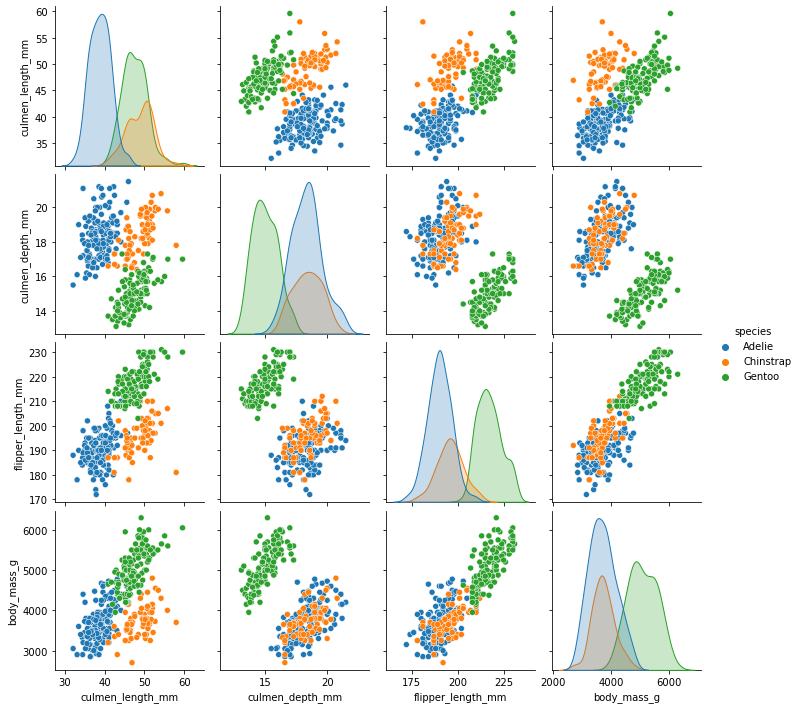

In [16]:
sns.pairplot(df,hue='species')

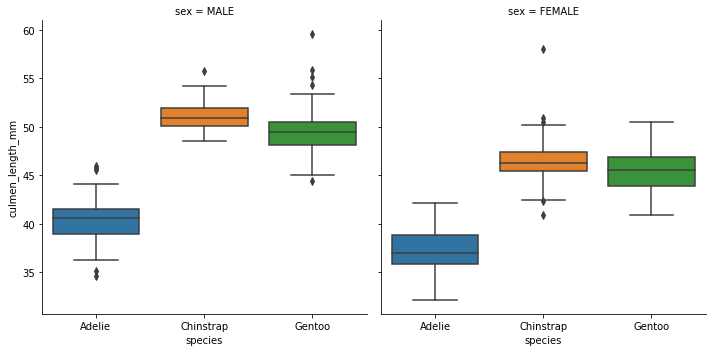

In [17]:
sns.catplot(x='species',
           y='culmen_length_mm',
           data=df,kind='box',col='sex')

In [18]:
df['island']

0      Torgersen
1      Torgersen
2      Torgersen
4      Torgersen
5      Torgersen
         ...    
338       Biscoe
340       Biscoe
341       Biscoe
342       Biscoe
343       Biscoe
Name: island, Length: 334, dtype: object

In [19]:
X=pd.get_dummies(df.drop('species',axis=1),drop_first=True)

In [20]:
y=df['species']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
model=DecisionTreeClassifier()

In [25]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [26]:
base_pred=model.predict(X_test)

In [27]:
from sklearn.metrics import classification_report,plot_confusion_matrix

In [28]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        41
   Chinstrap       0.96      0.96      0.96        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101



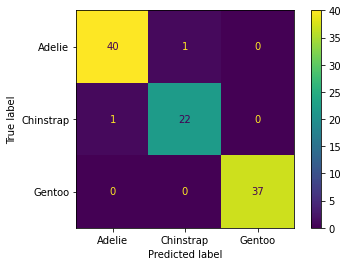

In [29]:
plot_confusion_matrix(model,X_test,y_test)

In [30]:
model.feature_importances_

array([0.33754639, 0.04203954, 0.53120101, 0.01085298, 0.0681854 ,
       0.01017467, 0.        ])

In [31]:
X.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'island_Dream', 'island_Torgersen', 'sex_MALE'],
      dtype='object')

In [32]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,
            columns=['Feature Importance']).sort_values('Feature Importance')

,Feature Importance
sex_MALE,0.000000
island_Torgersen,0.010175
body_mass_g,0.010853
culmen_depth_mm,0.042040
island_Dream,0.068185
culmen_length_mm,0.337546
flipper_length_mm,0.531201


In [33]:
from sklearn.tree import plot_tree

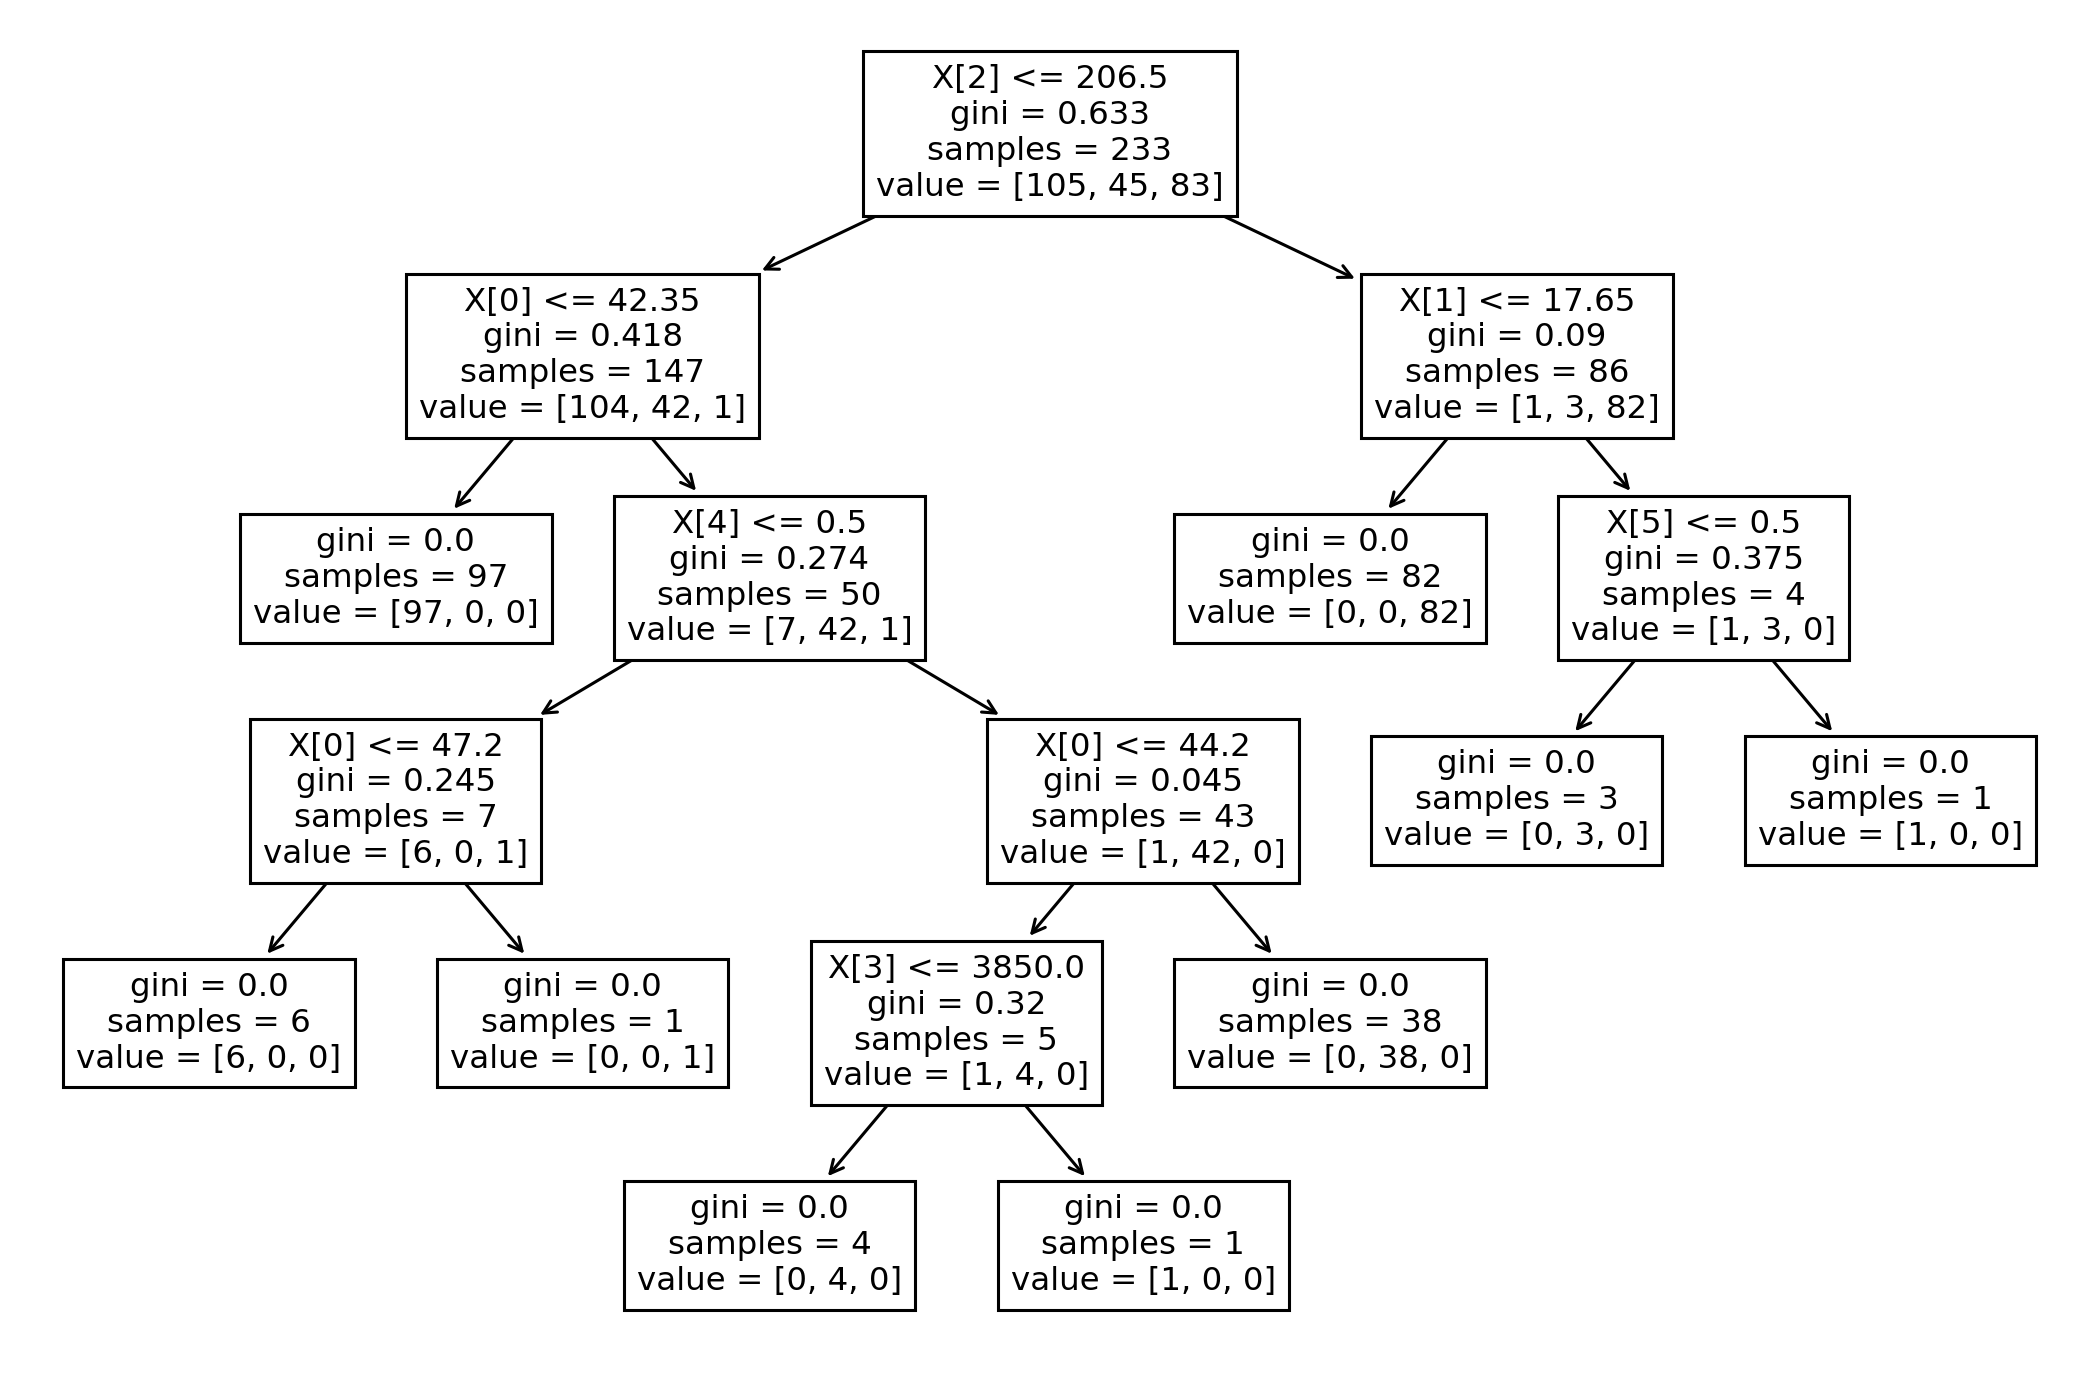

In [34]:
plt.figure(figsize=(12,8),dpi=221)
plot_tree(model);

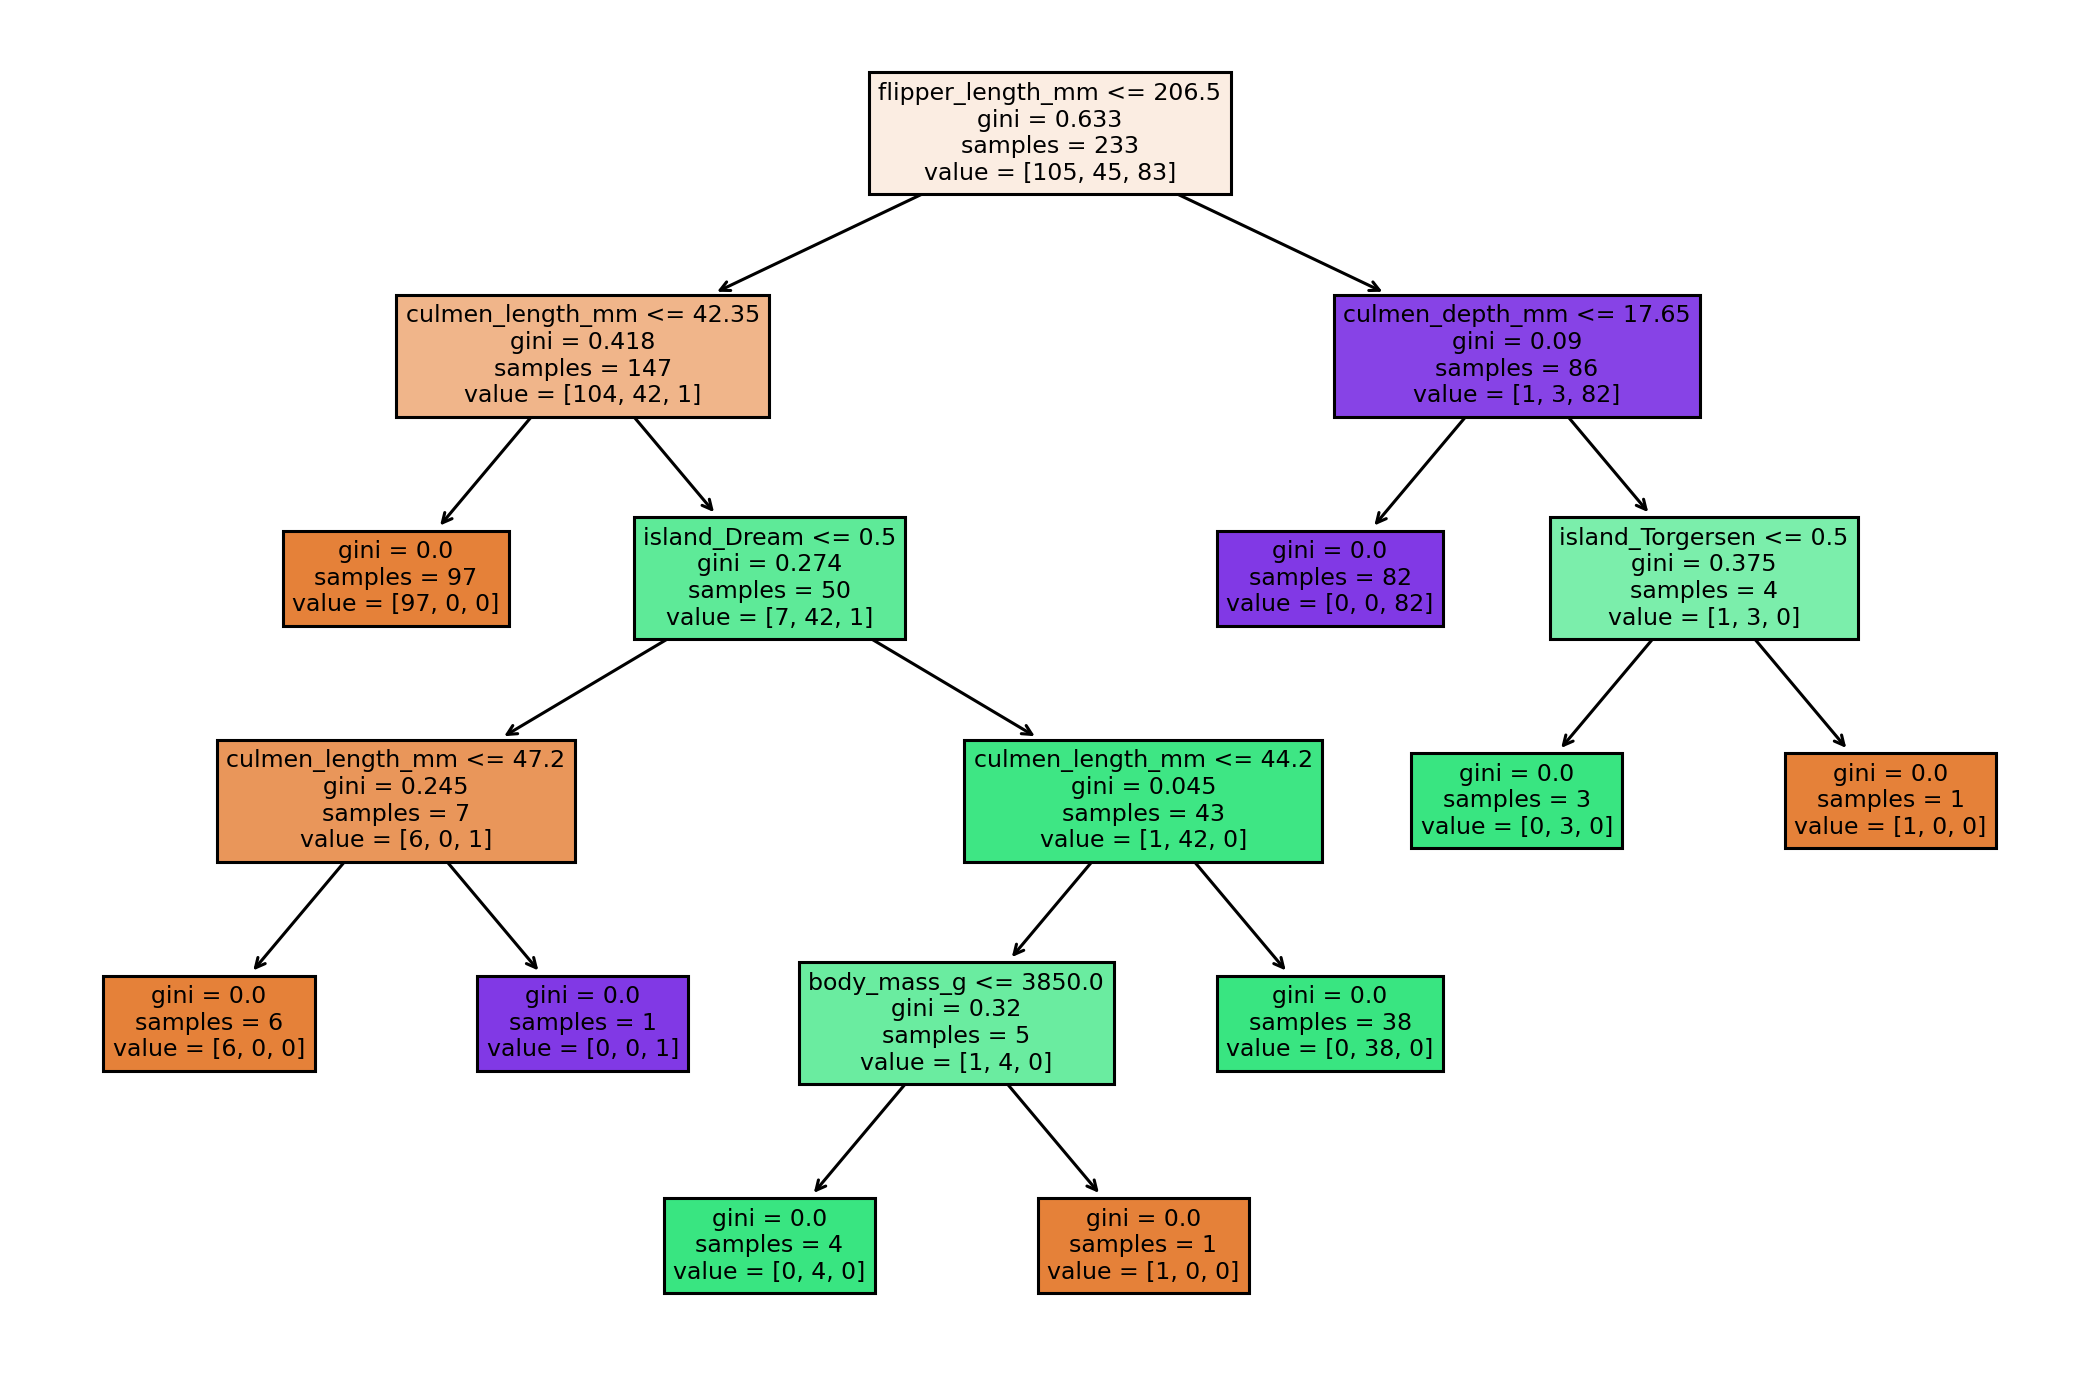

In [35]:
plt.figure(figsize=(12,8),dpi=221)
plot_tree(model,feature_names=X.columns,filled=True);

In [36]:
def report_model(model):
    
    model_preds= model.predict(X_test)
    print(classification_report(y_test,base_pred))
    print('\n')
    plt.figure(figsize=(12,8),dpi=221)
    plot_tree(model,feature_names=X.columns,filled=True);
    
    

In [37]:
pruned_tree=DecisionTreeClassifier(max_depth=3)

In [38]:
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        41
   Chinstrap       0.96      0.96      0.96        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101





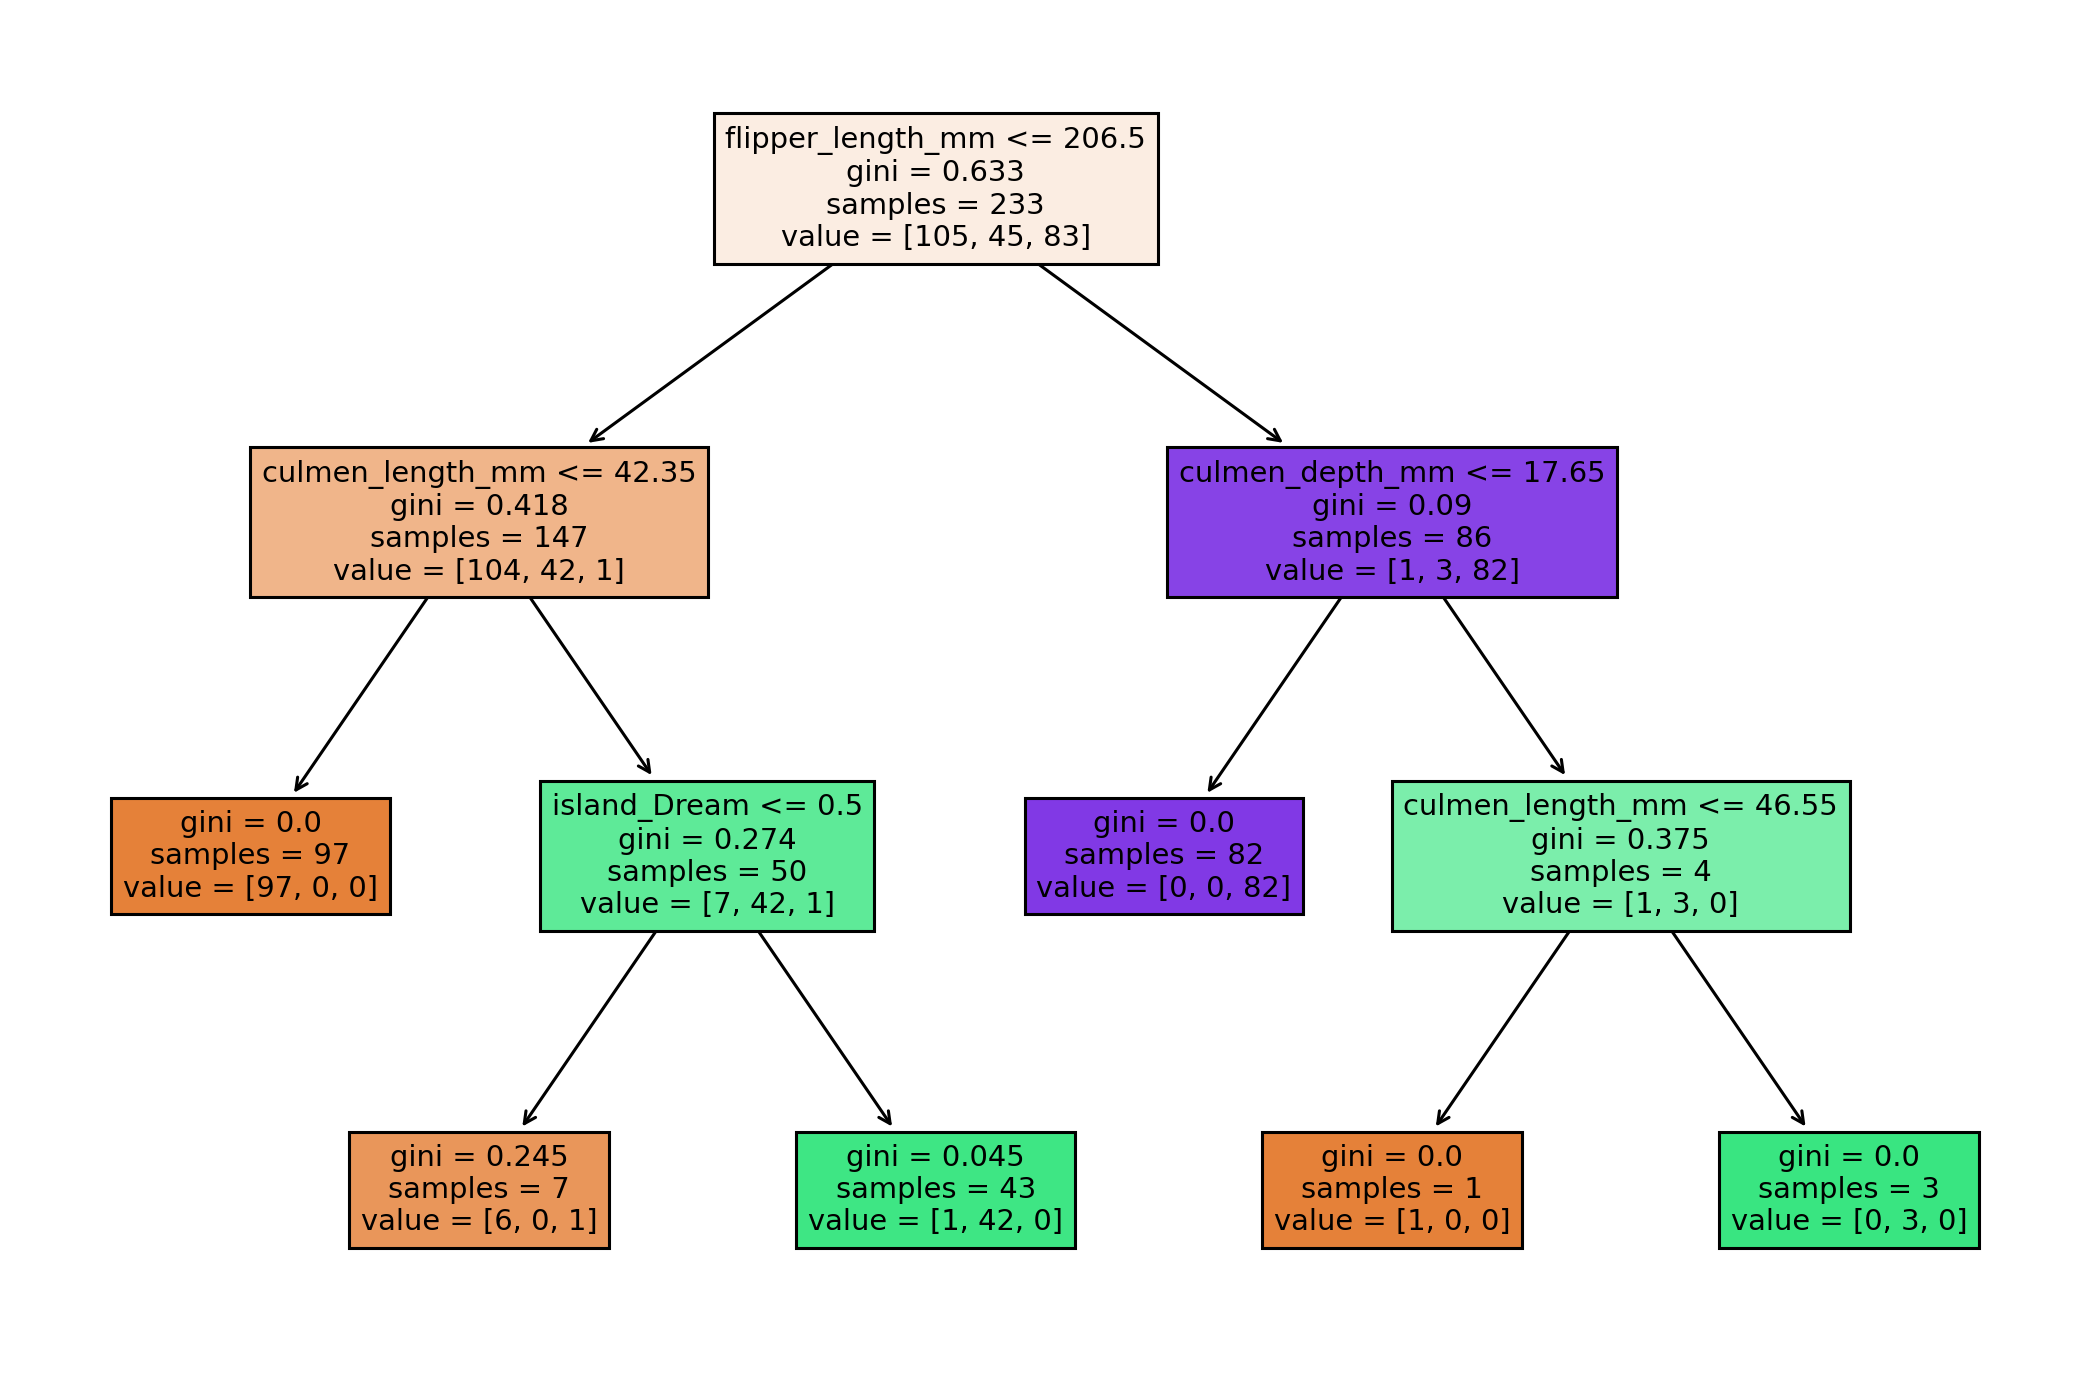

In [39]:
report_model(pruned_tree)

In [40]:
pruned_tree=DecisionTreeClassifier(max_depth=2)

In [41]:
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        41
   Chinstrap       0.96      0.96      0.96        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101





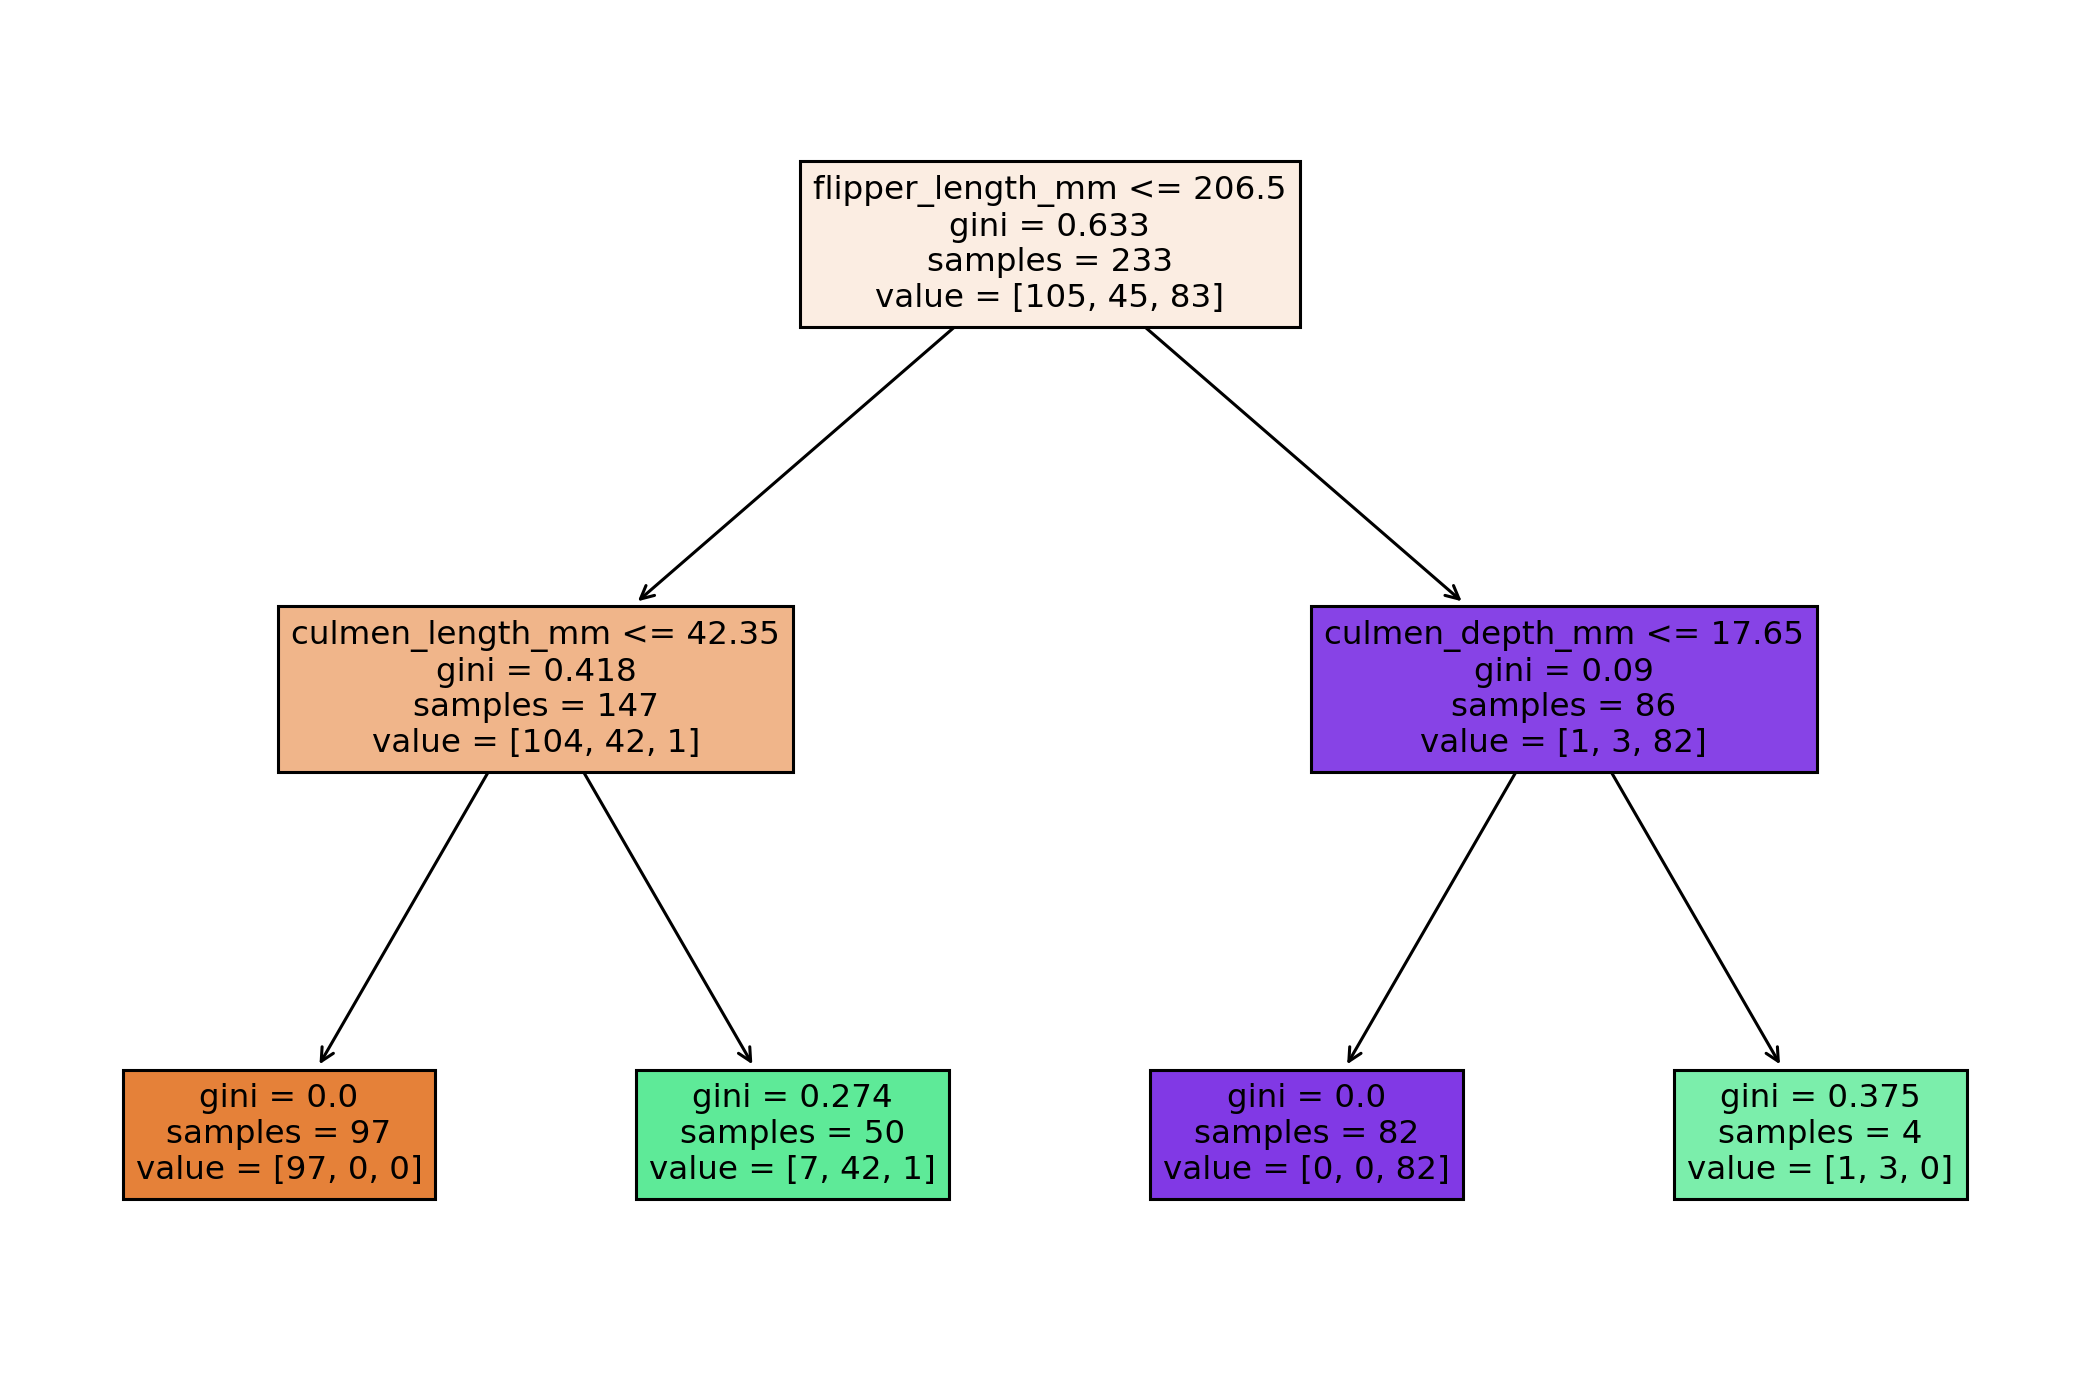

In [42]:
report_model(pruned_tree)

In [43]:
max_leaf_tree=DecisionTreeClassifier(max_leaf_nodes=3)

In [44]:
max_leaf_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        41
   Chinstrap       0.96      0.96      0.96        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101





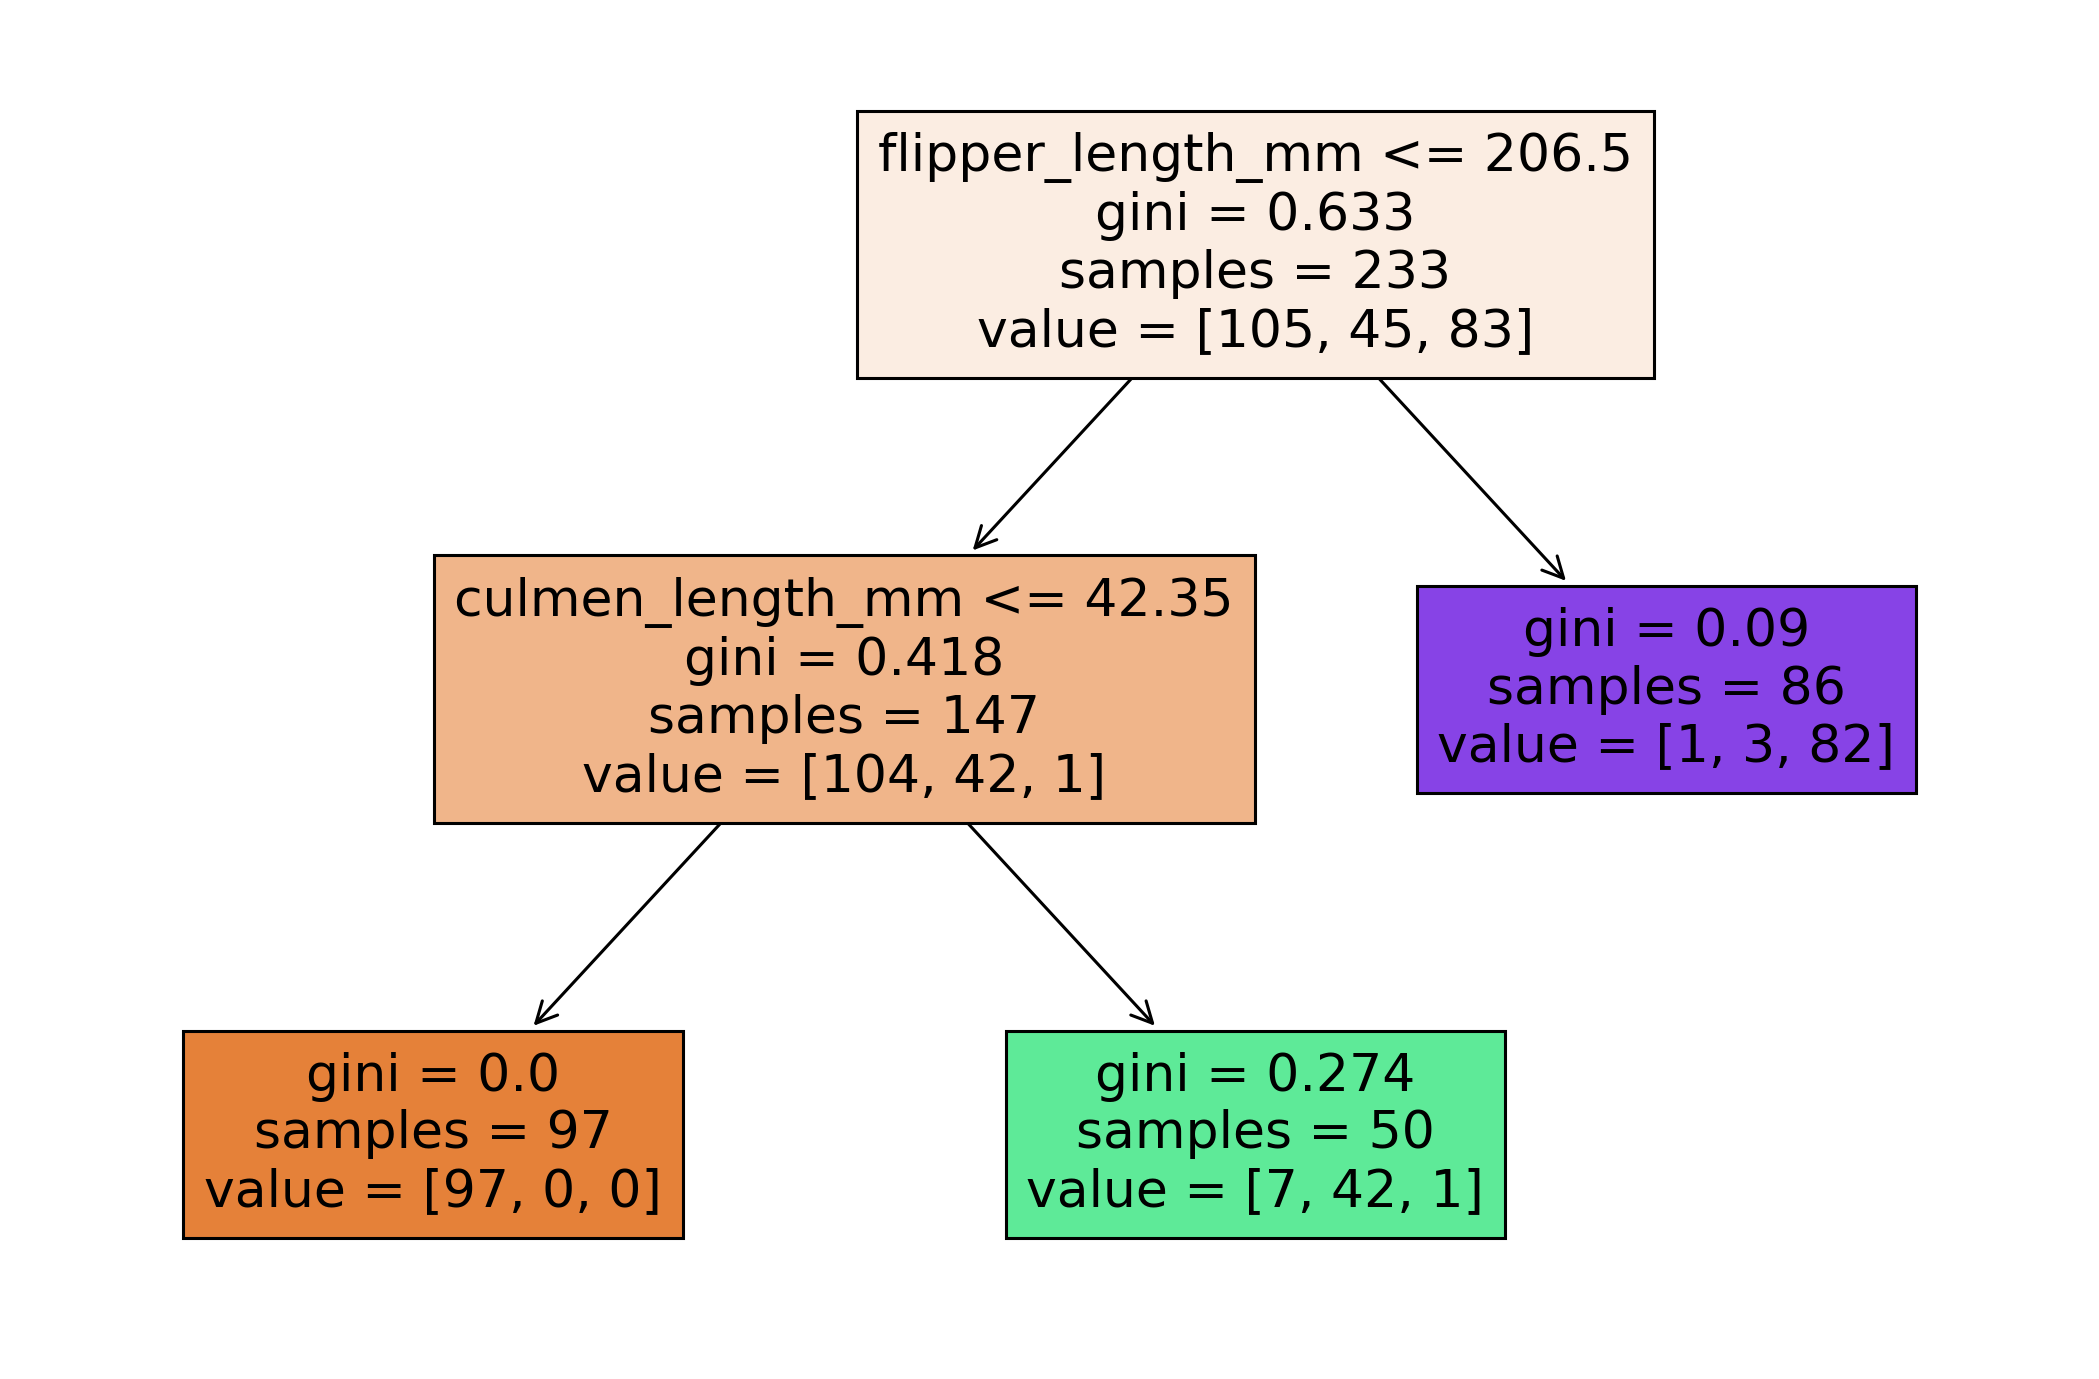

In [45]:
report_model(max_leaf_tree)

In [46]:
entropy_tree=DecisionTreeClassifier(criterion='entropy')

In [47]:
entropy_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        41
   Chinstrap       0.96      0.96      0.96        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101





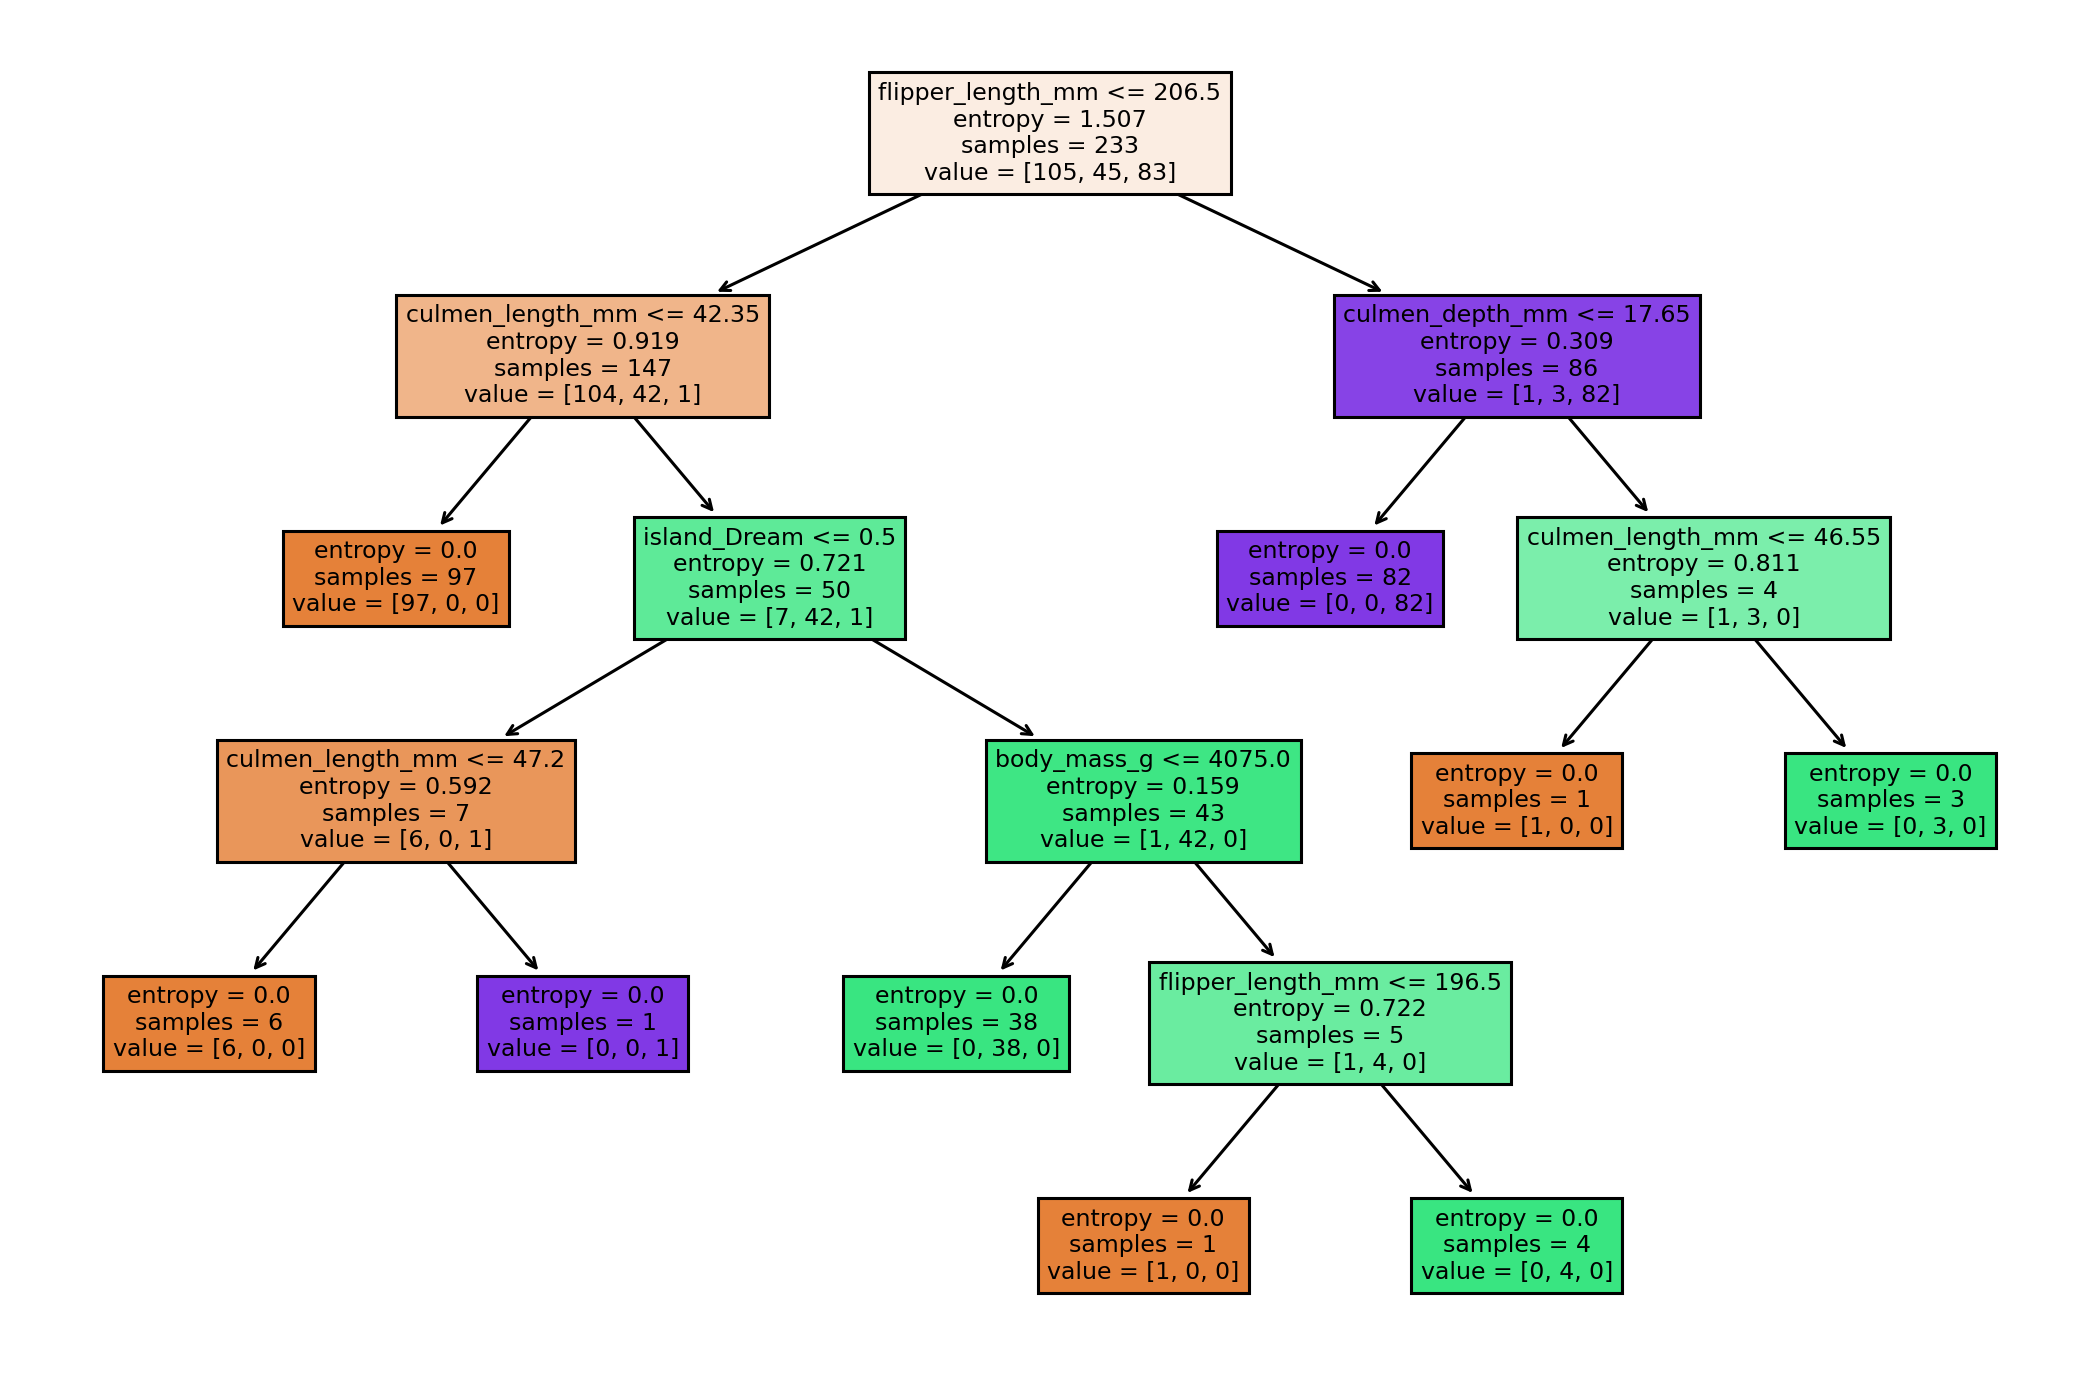

In [48]:
report_model(entropy_tree)

-----------------------
# Random Forest - Classifier

In [49]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [50]:
X=pd.get_dummies(df.drop('species',axis=1),drop_first=True)

In [51]:
y=df['species']

In [52]:
from sklearn.model_selection import train_test_split


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rfc=RandomForestClassifier(n_estimators=10,
                           max_features='auto',
                          random_state=101)

In [56]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [57]:
preds=rfc.predict(X_test)

In [58]:
from sklearn.metrics import plot_confusion_matrix,classification_report

In [59]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        41
   Chinstrap       0.96      0.96      0.96        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101



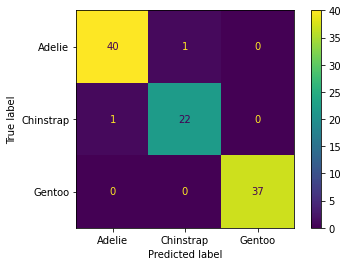

In [60]:
plot_confusion_matrix(rfc,X_test,y_test)

### Example:2

In [61]:
df=pd.read_csv('../DATA/data_banknote_authentication.csv')

In [62]:
df.head()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


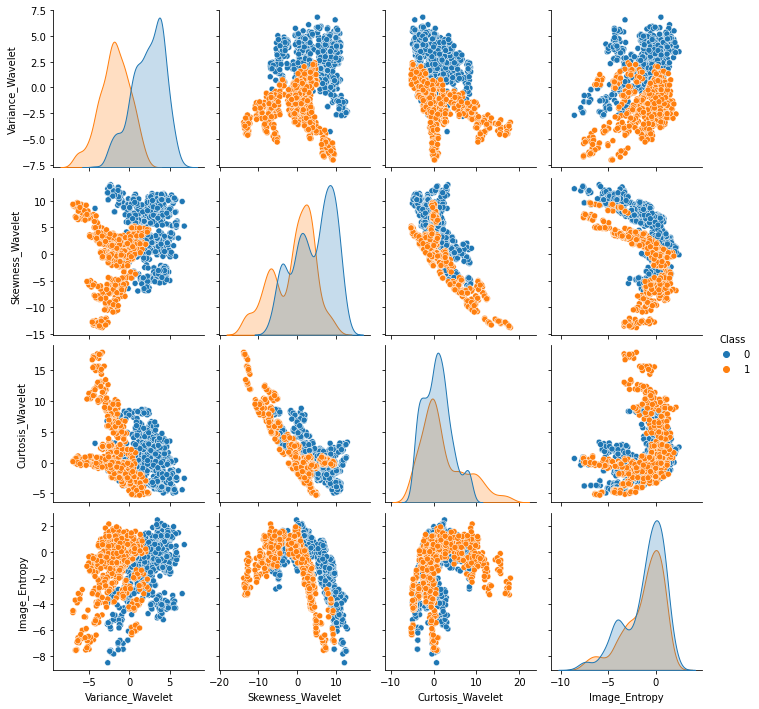

In [63]:
sns.pairplot(df,hue='Class')

In [64]:
X=df.drop('Class',axis=1)

In [65]:
y=df['Class']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
n_estimators=[64,100,128,200]
max_features=[2,3,4]
bootstrap=[True,False]
oob_score=[True,False]

In [70]:
param_grid={'n_estimators':n_estimators,'max_features':max_features,
           'bootstrap':bootstrap,'oob_score':oob_score}

In [71]:
rfc=RandomForestClassifier()

In [72]:
grid=GridSearchCV(rfc,param_grid=param_grid)

In [73]:
grid.fit(X_train,y_train)

C:\Users\pkana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pkana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pkana\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\pkana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pkana\anaconda

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [74]:
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 100, 'oob_score': False}

In [75]:
rfc=RandomForestClassifier(max_features=2, n_estimators=100, oob_score=True)

In [76]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_features=2, oob_score=True)

In [77]:
rfc.oob_score_

0.9948542024013722

In [78]:
preds=rfc.predict(X_test)

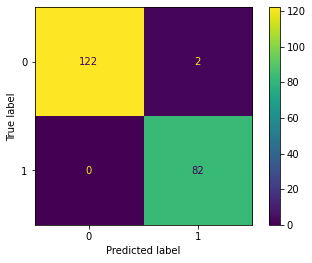

In [79]:
plot_confusion_matrix(rfc,X_test,y_test)

In [80]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       124
           1       0.98      1.00      0.99        82

    accuracy                           0.99       206
   macro avg       0.99      0.99      0.99       206
weighted avg       0.99      0.99      0.99       206



In [81]:
from sklearn.metrics import accuracy_score

In [82]:
errors=[]
misclassification=[]

for n in range(1,200):
    
    rfc=RandomForestClassifier(n_estimators=n,max_features=2)
    rfc.fit(X_train,y_train)
    preds=rfc.predict(X_test)
    err=1-accuracy_score(y_test,preds)
    n_missed=np.sum(preds!=y_test)
    
    errors.append(err)
    misclassification.append(n_missed)

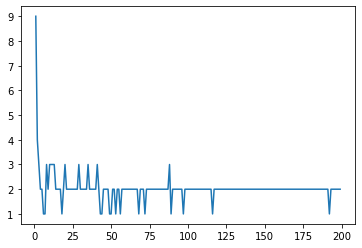

In [83]:
plt.plot(range(1,200),misclassification)

# Random Forest - Regression

In [84]:
df=pd.read_csv('../DATA/rock_density_xray.csv')

In [85]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [86]:
df.columns=['Signal','Density']

<AxesSubplot:xlabel='Signal', ylabel='Density'>

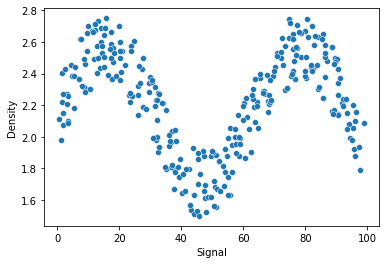

In [87]:
sns.scatterplot(x='Signal',y='Density',data=df)

In [88]:
X=df['Signal'].values.reshape(-1,1)
y=df['Density']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

### Linear Regression

In [90]:
from sklearn.linear_model import LinearRegression

In [91]:
lr_model=LinearRegression()

In [92]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [93]:
lr_preds=lr_model.predict(X_test)

In [94]:
lr_preds

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

In [95]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [96]:
mean_absolute_error(y_test,lr_preds)

0.211198973318633

In [97]:
np.sqrt(mean_squared_error(y_test,lr_preds))

0.2570051996584629

In [98]:
signal_range=np.arange(0,100)

In [99]:
signal_preds=lr_model.predict(signal_range.reshape(-1,1))

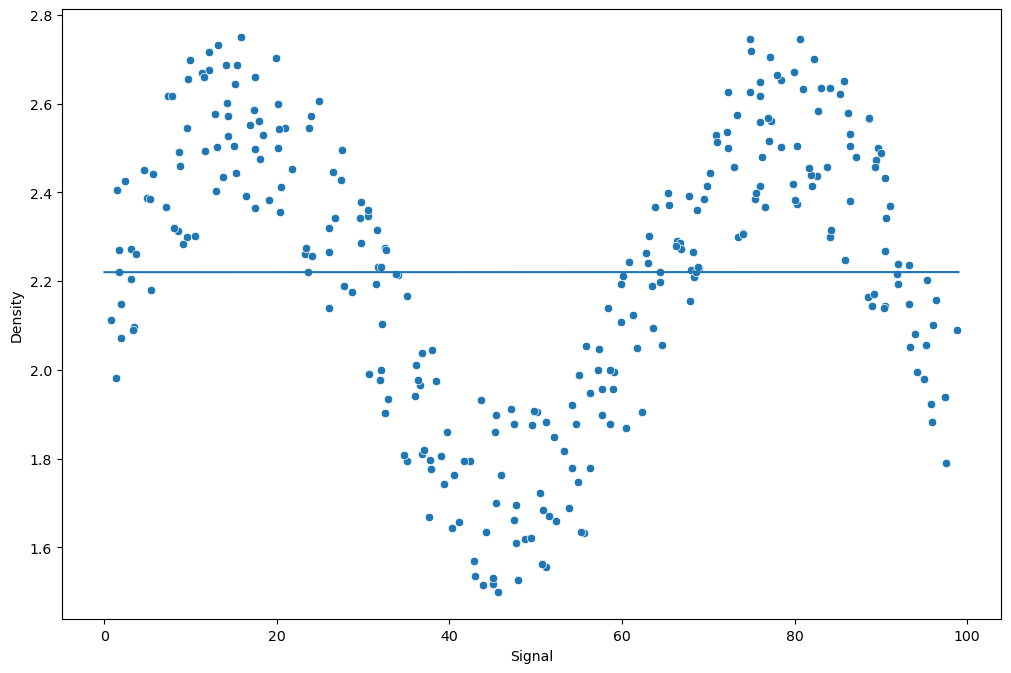

In [100]:
plt.figure(figsize=(12,8),dpi=101)
sns.scatterplot(x='Signal',y='Density',data=df)
plt.plot(signal_preds)


### Polynomial Regression

In [101]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    model.fit(X_train,y_train)
    
    preds=model.predict(X_test)
    rmse=np.sqrt(mean_squared_error(y_test,preds))
    mae=mean_absolute_error(y_test,preds)
    print(f'MAE:{mae}')
    print(f'RMSE:{rmse}')
    
    
    signal_range=np.arange(0,100)
    signal_preds= model.predict(signal_range.reshape(-1,1))
    
    plt.figure(figsize=(12,8),dpi=101)
    sns.scatterplot(x='Signal',y='Density',data=df,color='black')
    
    plt.plot(signal_range,signal_preds)
    

In [102]:
model=LinearRegression()

MAE:0.211198973318633
RMSE:0.2570051996584629


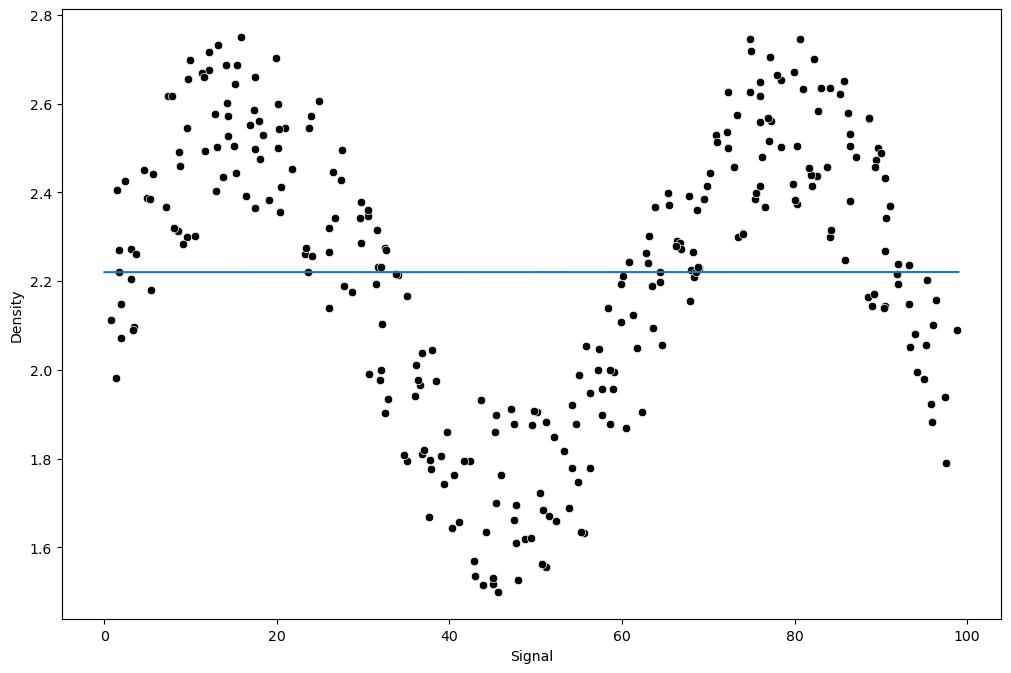

In [103]:
run_model(model,X_train,y_train,X_test,y_test)

In [104]:
from sklearn.pipeline import make_pipeline

In [105]:
from sklearn.preprocessing import PolynomialFeatures

In [106]:
pipe=make_pipeline(PolynomialFeatures(degree=2),LinearRegression())

MAE:0.22903105443511165
RMSE:0.28173095637255463


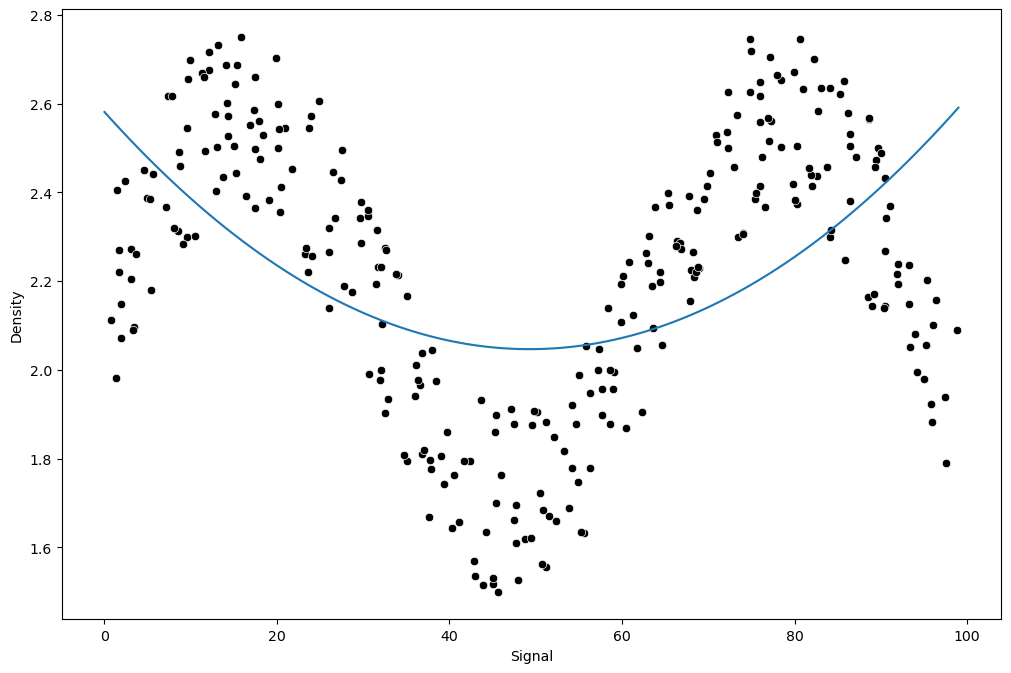

In [107]:
run_model(pipe,X_train,y_train,X_test,y_test)

In [108]:
pipe=make_pipeline(PolynomialFeatures(degree=15),LinearRegression())

MAE:0.14577954604574475
RMSE:0.17364657128893415


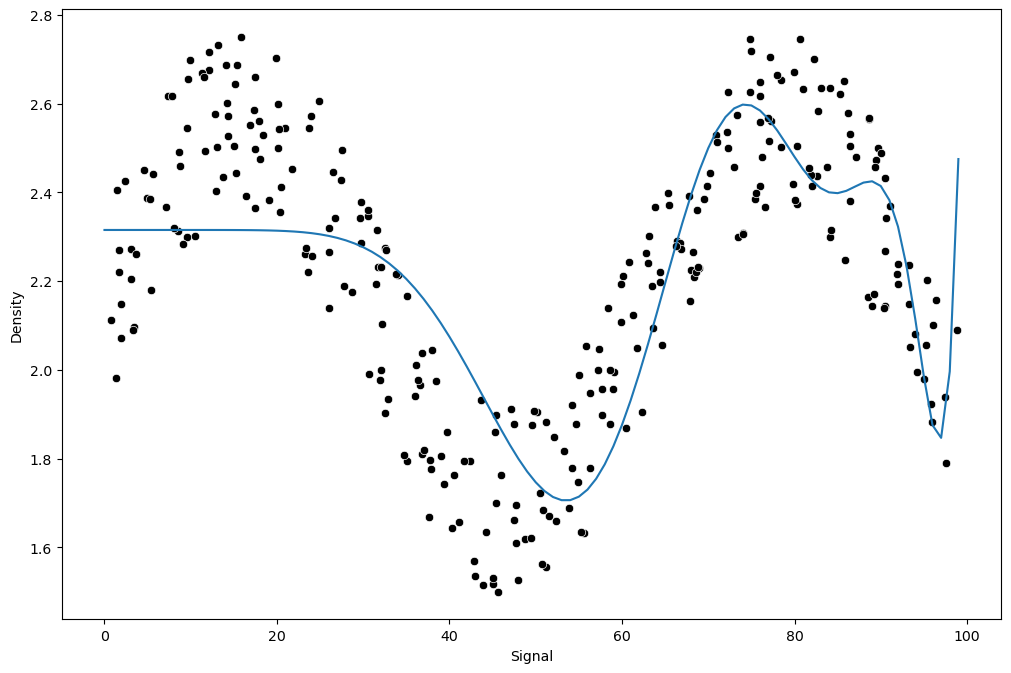

In [109]:
run_model(pipe,X_train,y_train,X_test,y_test)

MAE:0.1188104093225625
RMSE:0.1361534844595092


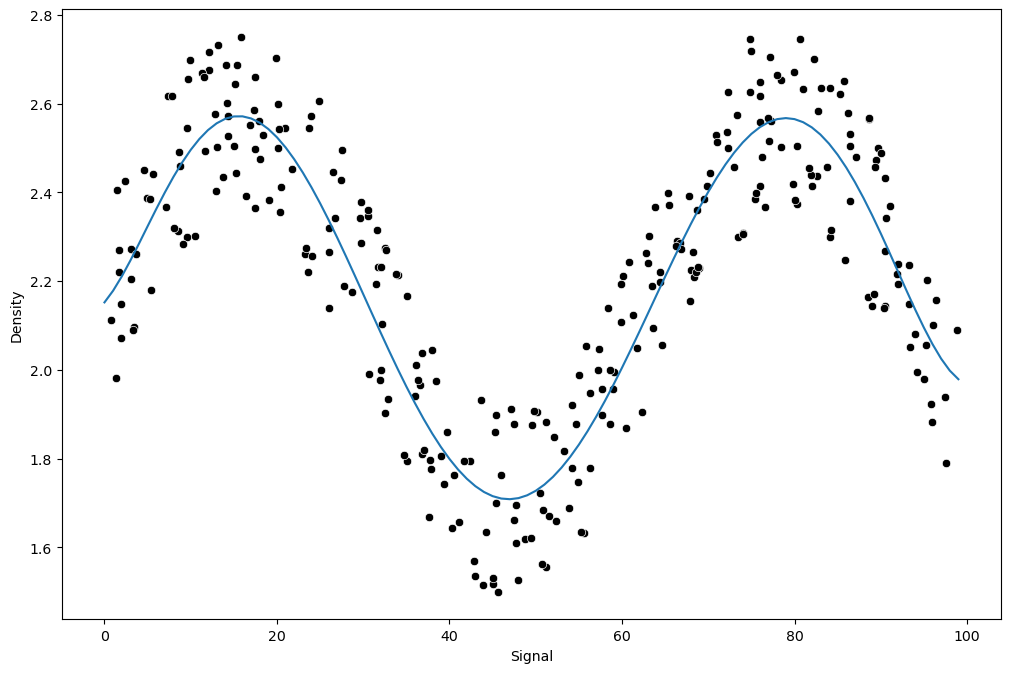

In [110]:
pipe=make_pipeline(PolynomialFeatures(degree=7),LinearRegression())
run_model(pipe,X_train,y_train,X_test,y_test)

### KNN

In [111]:
from sklearn.neighbors import KNeighborsRegressor

MAE:0.11877297474442378
RMSE:0.1523487028635337
MAE:0.12198383614100558
RMSE:0.13730685016923647
MAE:0.11635971693292672
RMSE:0.13277855732740926


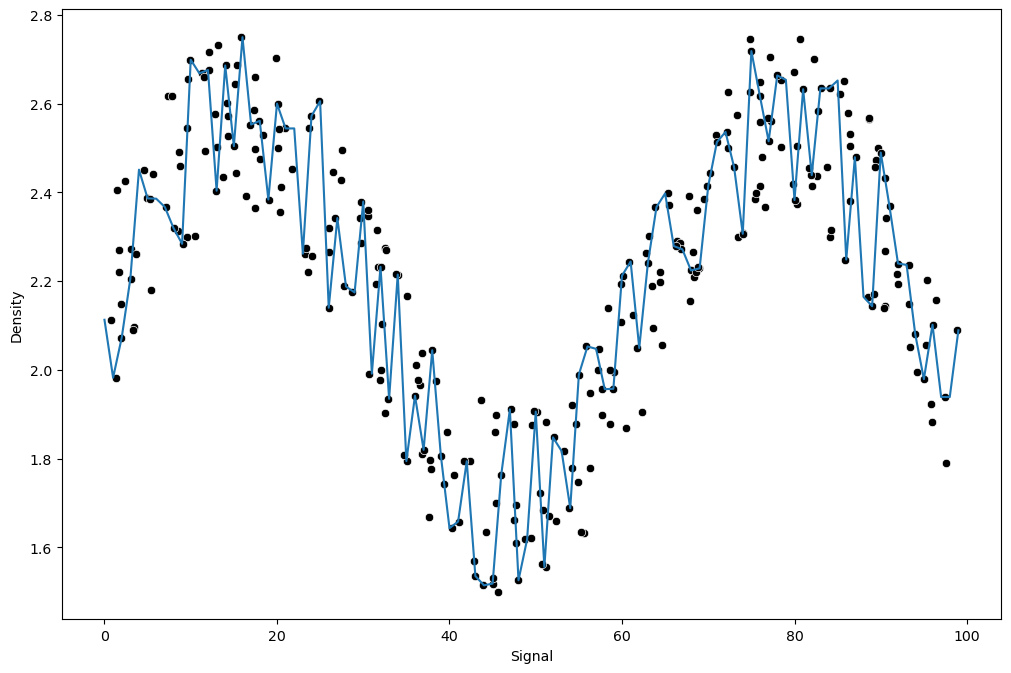

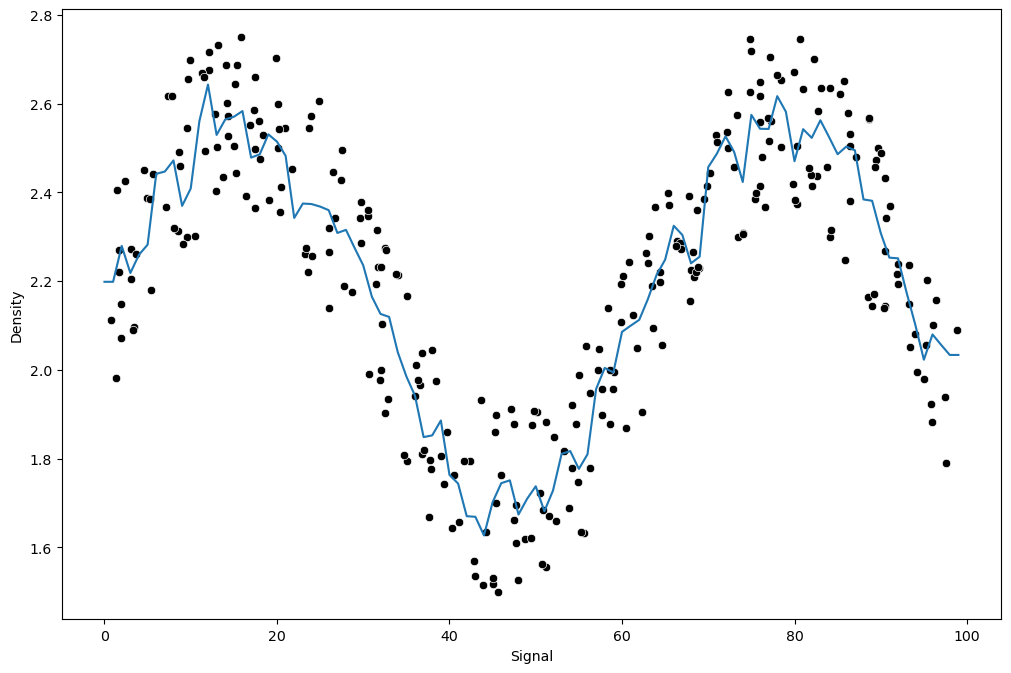

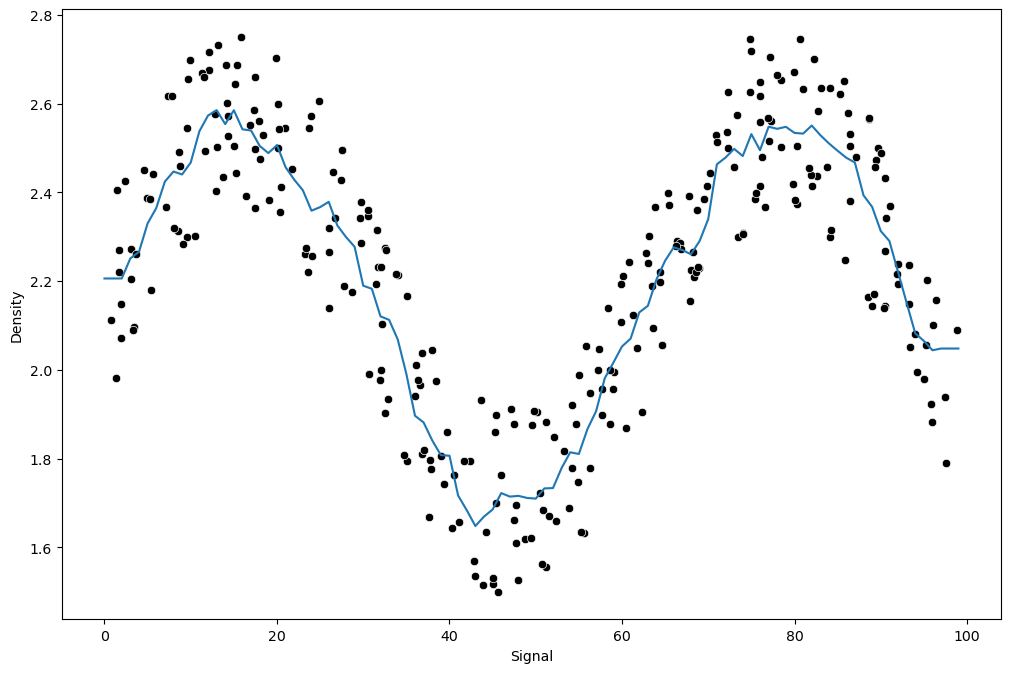

In [112]:
k_values=[1,5,10]

for n in k_values:
    model=KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)
    

### Decision Tree Regressor

In [113]:
from sklearn.tree import DecisionTreeRegressor

In [114]:
model=DecisionTreeRegressor()

MAE:0.11877297474442378
RMSE:0.1523487028635337


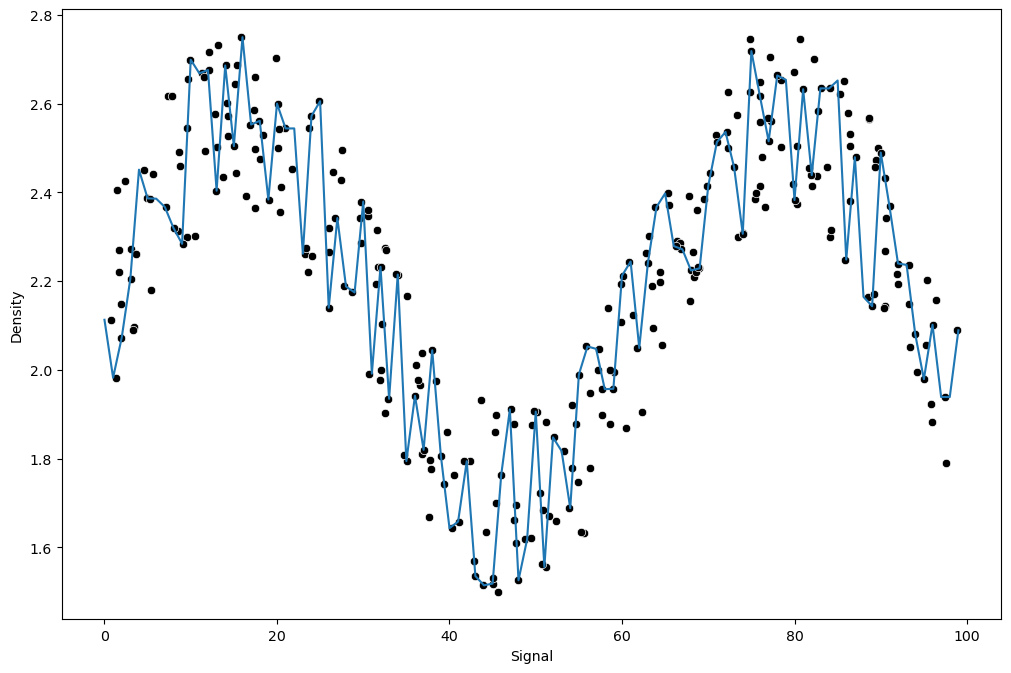

In [115]:
run_model(model,X_train,y_train,X_test,y_test)

### SVM

In [116]:
from sklearn.svm import SVR

In [117]:
from sklearn.model_selection import GridSearchCV

In [118]:
svr=SVR()
param_grid={'C':[0.01,0.1,1,5,10,100,1000],
           'gamma':['auto','scale']}



grid=GridSearchCV(svr,param_grid)

MAE:0.10854210121348368
RMSE:0.12646999302046696


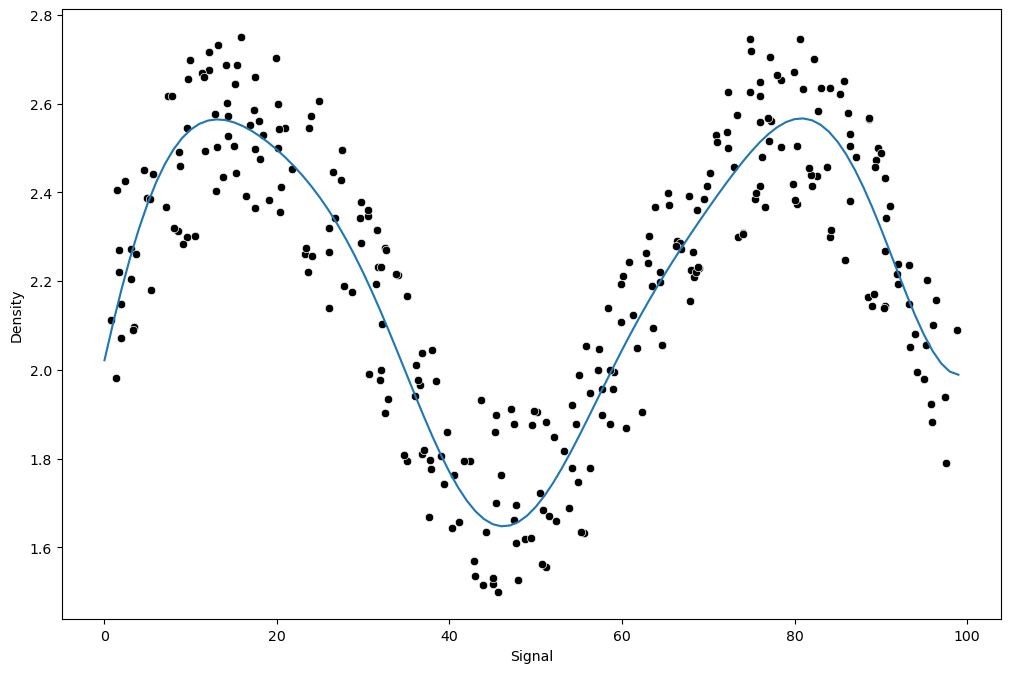

In [119]:
run_model(grid,X_train,y_train,X_test,y_test)

### Random Forest Regression

In [120]:
from sklearn.ensemble import RandomForestRegressor

In [121]:
rfr=RandomForestRegressor(n_estimators=10)

MAE:0.10854031619226752
RMSE:0.13583908620372062


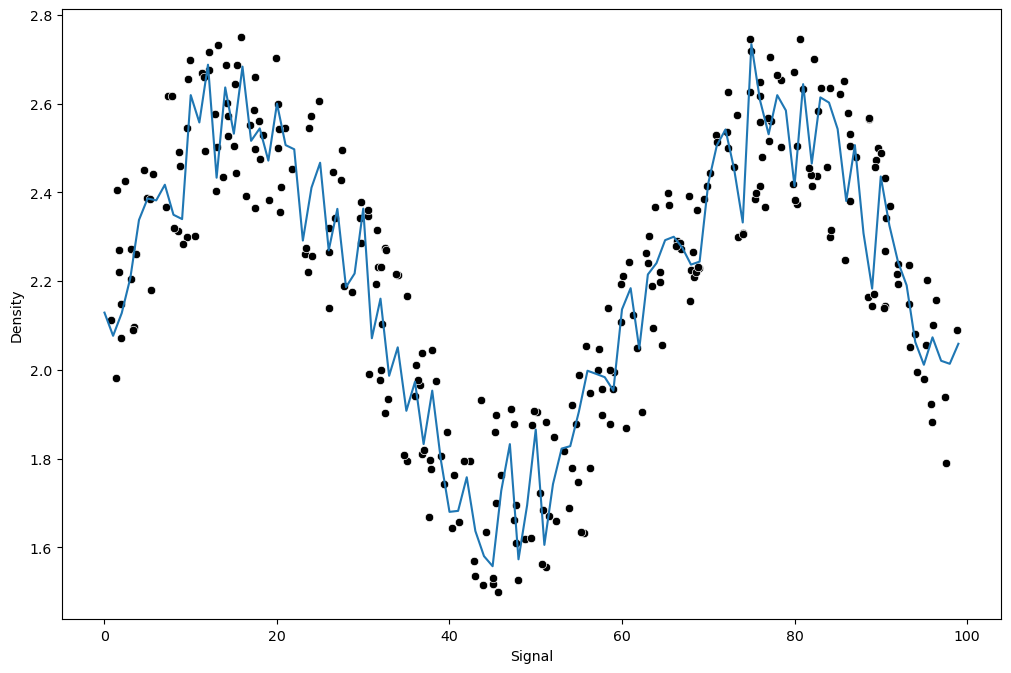

In [122]:
run_model(rfr,X_train,y_train,X_test,y_test)

### Boosting

In [123]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

In [124]:
model=GradientBoostingRegressor()

MAE:0.11318284854800689
RMSE:0.13294148649584667


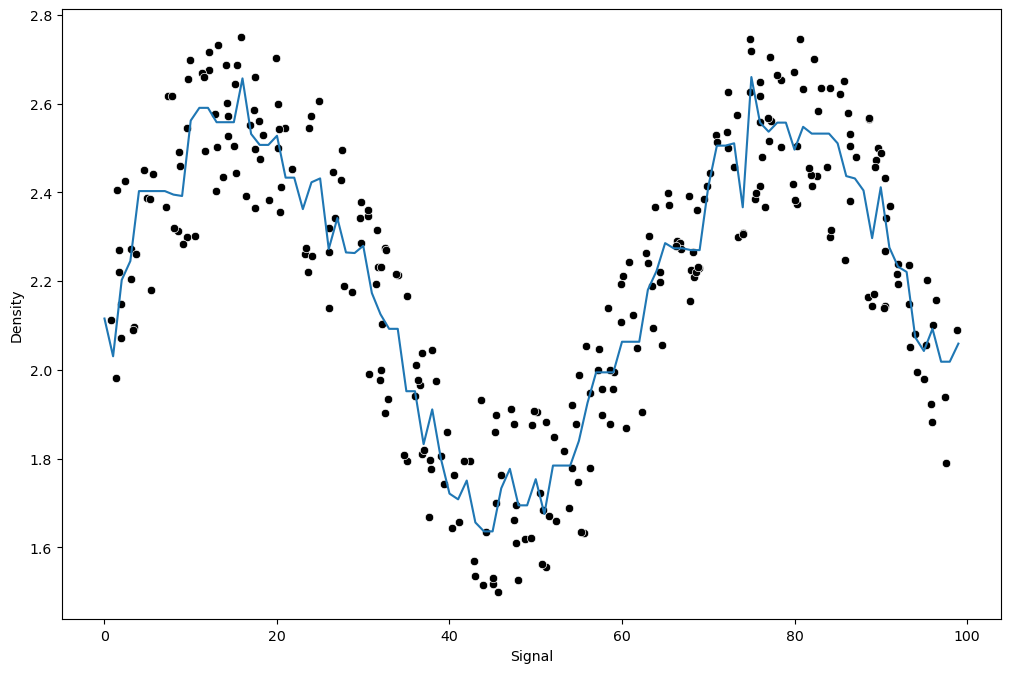

In [125]:
run_model(model,X_train,y_train,X_test,y_test)

In [126]:
model=AdaBoostRegressor()

MAE:0.12041062728122559
RMSE:0.1372746175715294


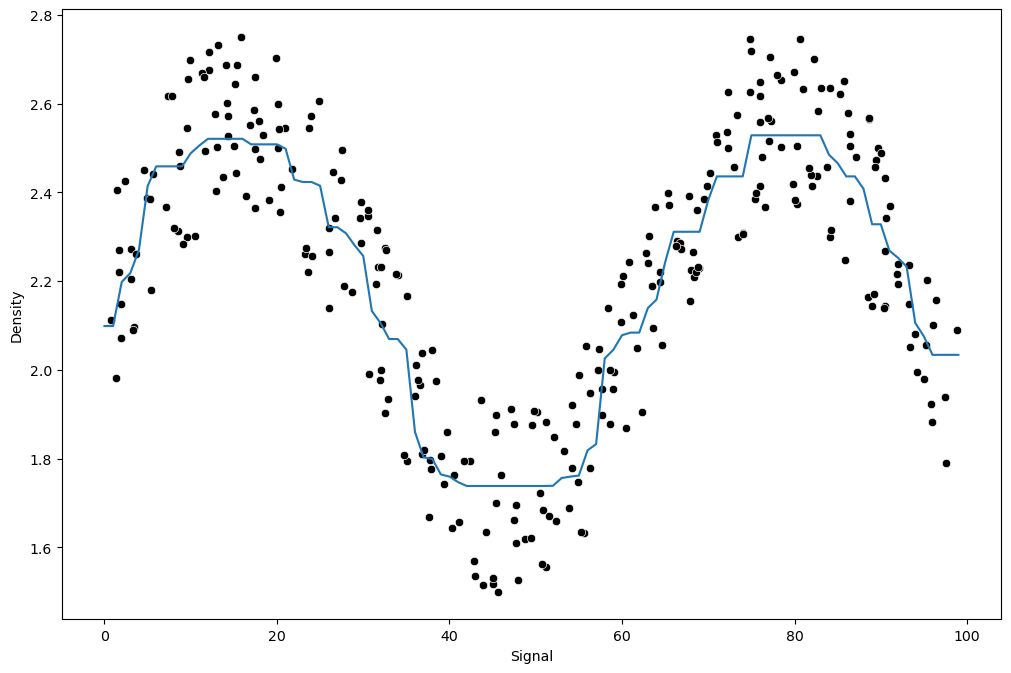

In [127]:
run_model(model,X_train,y_train,X_test,y_test)

### Adaboost

In [128]:
df=pd.read_csv('../DATA/mushrooms.csv')

In [129]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


<AxesSubplot:xlabel='class', ylabel='count'>

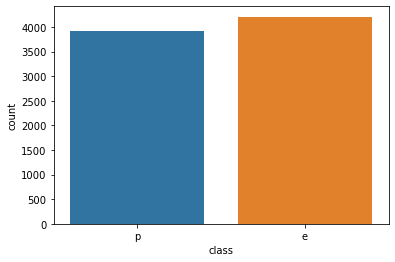

In [130]:
sns.countplot(data=df,x='class')

In [131]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [136]:
feat_uni=df.describe().T.reset_index().sort_values('unique')

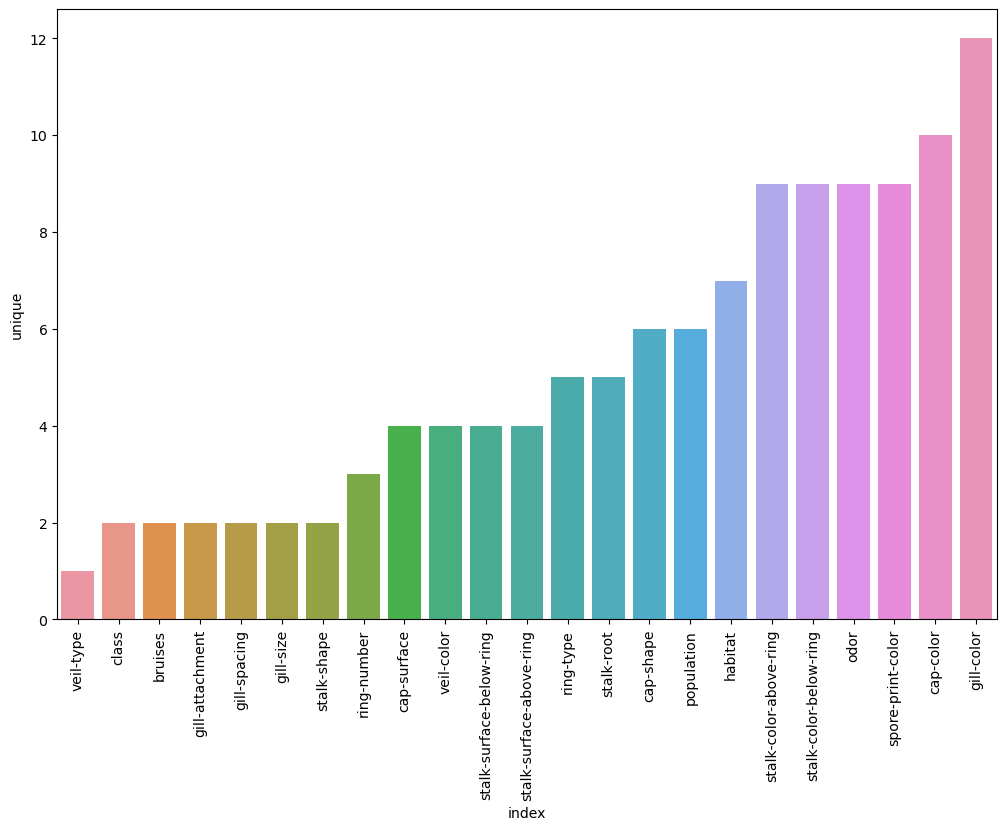

In [139]:
plt.figure(figsize=(12,8),dpi=101)
sns.barplot(data=feat_uni,x='index',y='unique')
plt.xticks(rotation=90);

In [140]:
X=df.drop('class',axis=1)

In [143]:
#X.isnull().sum()

In [144]:
X=pd.get_dummies(X,drop_first=True)

In [145]:
y=df['class']

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [147]:
from sklearn.ensemble import AdaBoostClassifier

In [148]:
model=AdaBoostClassifier(n_estimators=1)

In [149]:
model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=1)

In [150]:
preds=model.predict(X_test)

In [151]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



In [153]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [154]:
model.feature_importances_.argmax()

22

In [155]:
X.columns[22]

'odor_n'

<AxesSubplot:xlabel='odor', ylabel='count'>

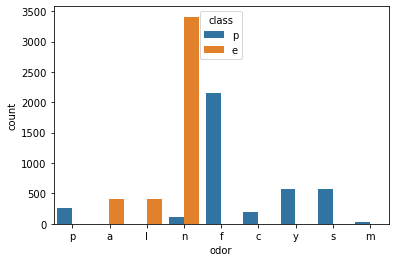

In [158]:
sns.countplot(data=df,x='odor',hue='class')

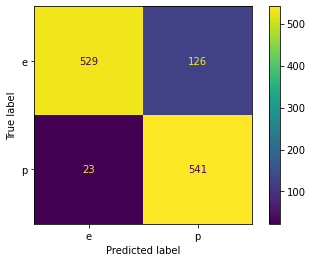

In [152]:
plot_confusion_matrix(model,X_test,y_test)

In [160]:
len(X.columnsumns)

95

In [159]:
error_rates=[]

for n in range(1,96):
    
    model=AdaBoostClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    preds=model.predict(X_test)
    
    err=1-accuracy_score(y_test,preds)
    
    error_rates.append(err)

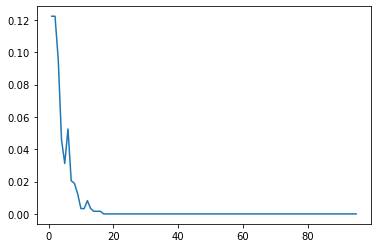

In [161]:
plt.plot(range(1,96),error_rates)

In [163]:
model

AdaBoostClassifier(n_estimators=95)

In [165]:
feat=pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Importance'],)

In [168]:
imp_feat=feat[feat['Importance']>0]

In [169]:
imp_feat

,Importance
cap-color_c,0.010526
cap-color_n,0.010526
cap-color_w,0.010526
bruises_t,0.052632
odor_c,0.031579
odor_f,0.031579
odor_n,0.063158
odor_p,0.021053
gill-spacing_w,0.094737
gill-size_n,0.094737


<AxesSubplot:ylabel='Importance'>

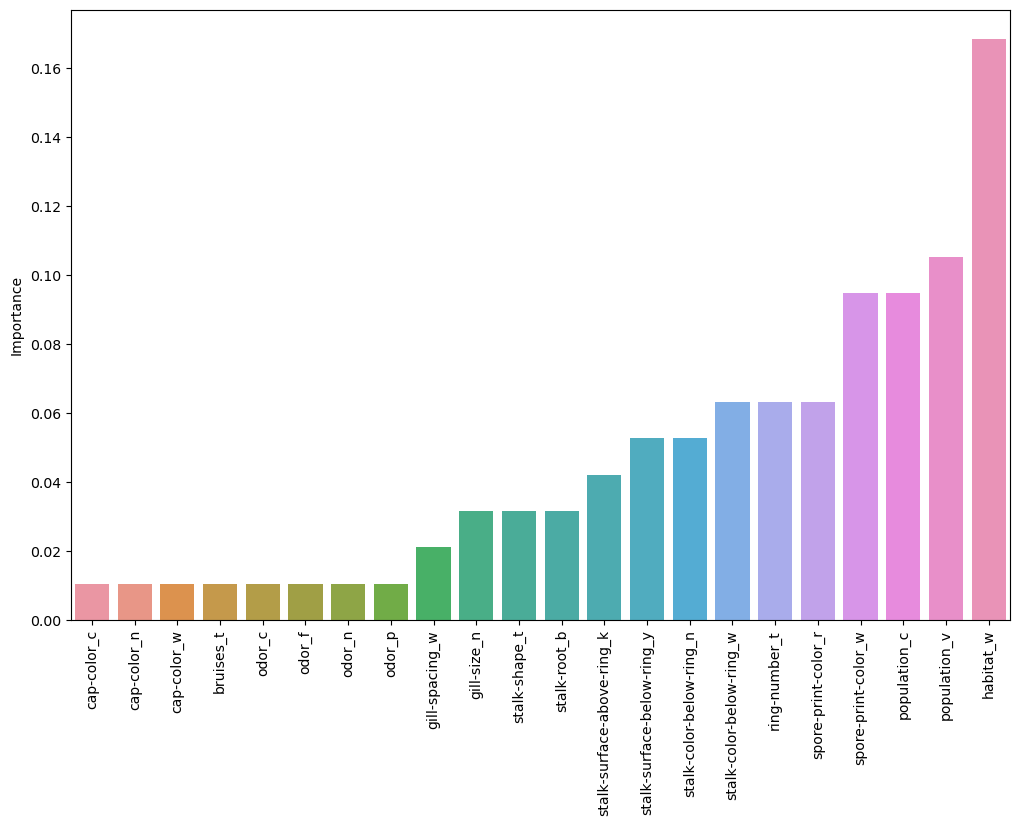

In [171]:
plt.figure(figsize=(12,8),dpi=101)
plt.xticks(rotation=90);

sns.barplot(data=imp_feat.sort_values('Importance'),x=imp_feat.index,y='Importance')

### Gradient Boosting

In [208]:
df=pd.read_csv('../DATA/mushrooms.csv')

In [209]:
X=df.drop('class',axis=1)

In [210]:
X=pd.get_dummies(X,drop_first=True)

In [211]:
y=df['class']

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [214]:
from sklearn.ensemble import GradientBoostingClassifier

In [215]:
from sklearn.model_selection import GridSearchCV

In [216]:
param_grid={'n_estimators':[50,100],
           'learning_rate':[0.1,0.05,0.2],
           'max_depth':[3,4,5]}

In [217]:
gb_model=GradientBoostingClassifier()

In [218]:
grid=GridSearchCV(gb_model,param_grid)

In [219]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [220]:
preds=grid.predict(X_test)

In [221]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



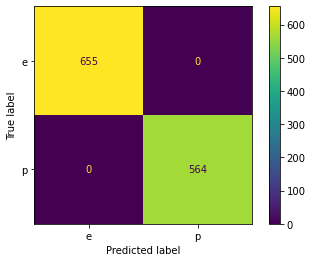

In [222]:
plot_confusion_matrix(grid,X_test,y_test)

In [223]:
accuracy_score(y_test,preds)

1.0

In [224]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [226]:
grid.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [227]:
grid.best_estimator_.feature_importances_

array([2.91150176e-04, 3.34997689e-16, 0.00000000e+00, 0.00000000e+00,
       7.98937701e-17, 1.04902579e-03, 7.12281859e-18, 1.27734798e-06,
       1.01999268e-17, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.33771679e-19, 1.09176634e-21, 0.00000000e+00, 6.04605717e-05,
       2.31213349e-03, 5.41428384e-02, 6.24175887e-04, 1.73867595e-02,
       1.82499853e-02, 3.22811887e-03, 6.14744334e-01, 8.63939501e-03,
       0.00000000e+00, 0.00000000e+00, 2.34788460e-21, 1.25092906e-02,
       1.03950811e-02, 0.00000000e+00, 1.06361444e-16, 5.79387482e-18,
       1.01388231e-17, 0.00000000e+00, 0.00000000e+00, 5.55180792e-19,
       2.00622841e-16, 0.00000000e+00, 3.51891552e-18, 0.00000000e+00,
       0.00000000e+00, 1.93643487e-03, 1.36028897e-01, 0.00000000e+00,
       1.41142003e-02, 2.87695826e-03, 2.24567855e-03, 7.19522059e-06,
       1.83319493e-05, 2.53838872e-04, 5.33282634e-02, 1.05284518e-05,
       0.00000000e+00, 0.00000000e+00, 1.17280174e-04, 0.00000000e+00,
      

In [228]:
feat_imp=grid.best_estimator_.feature_importances_

In [229]:
imp_feats=pd.DataFrame(index=X.columns,
                      data=feat_imp,
                      columns=['importance'])

In [232]:
imp_feats=imp_feats[imp_feats['importance']>0.0005]

In [234]:
imp_feats=imp_feats.sort_values('importance')

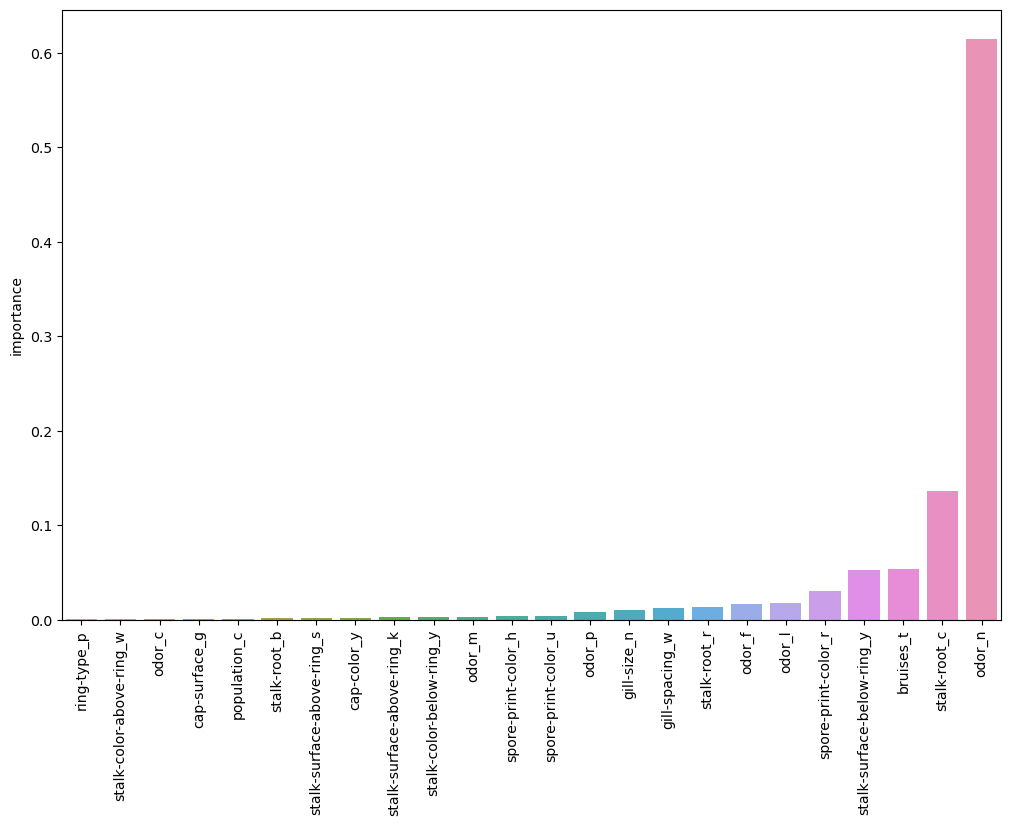

In [237]:
plt.figure(figsize=(12,8),dpi=101)

sns.barplot(data=imp_feats,
           x=imp_feats.index,
           y='importance')

plt.xticks(rotation=90);
